# 1. PRE-PROCESSING DATA

In [ ]:
# necessary for bertopic installation but interferes with gensim. Run only once, disconnect and delete runtime and then run the remainder of the code (without running this cell again)

import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import nltk
import nltk; nltk.download('popular')
import spacy
import matplotlib.pyplot as plt


%matplotlib inline

Mounted at /content/drive


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [ ]:
# save and import models

import pickle

def save_model(model, file_name):
  file_path = '/content/drive/MyDrive/MScProject/' + file_name
  with open(file_path, 'wb') as f:
    pickle.dump(model, f)
  return file_path

def load_model(file_name):
  file_path = '/content/drive/MyDrive/MScProject/' + file_name
  with open(file_path, 'rb') as f:
    model = pickle.load(f)
  return model

**Pre-processing for r/adhdwomen dataset**

In [ ]:
# convert the reddit ADHD dataset to a dataframe
# https://www.kaggle.com/datasets/jerseyneo/reddit-adhd-dataset The data can be found under this link
df = pd.read_csv('/content/drive/My Drive/MScProject/adhdwomen.csv', encoding='utf-8')

Anderson, K. (2023) *Stuff I've Seen: A System for Personal Information Retrieval and Re-use*. Research Paper Presentation for ECS736P. Unpublished.

In [ ]:
# drop the columns the search engine won't use - show only title, selftext, url and created_datetime

corpus = df[['title', 'selftext', 'url', 'created_datetime']]
corpus

,title,selftext,url,created_datetime
0,Adult Women Are the New Face of ADHD,NaN,http://www.thedailybeast.com/articles/2014/06/...,2014-07-01 14:07:46
1,Why Women Hide Their ADHD Symptoms,NaN,https://euromd.com/9-diseases-and-conditions/1...,2014-10-08 20:48:14
2,Adult ADHD and Burnout: Success or Failure?,NaN,http://rethinkadhd.wordpress.com/2014/12/23/ad...,2014-12-23 15:34:03
3,How Am I And My ADHD Still Alive?,NaN,http://blogs.psychcentral.com/adhd-man/2015/01...,2015-01-13 23:35:23
4,I'd like to see this subreddit grow!,"Hello, I'm a working, married, mother of 3. I...",https://www.reddit.com/r/adhdwomen/comments/32...,2015-04-11 18:43:49
...,...,...,...,...
44379,Hahaha,[deleted],https://i.redd.it/izcb69jf82x61.jpg,2021-05-04 07:58:07
44380,I wanted to show you what helps me tremendousl...,NaN,https://i.redd.it/yitzcpeqb2x61.jpg,2021-05-04 08:16:38
44381,How much forgetfulness is normal?,"As in, when should I worry it's not the ADHD c...",https://www.reddit.com/r/adhdwomen/comments/n4...,2021-05-04 08:47:48
44382,Having/making friends is so hard for me that m...,Hi! First time posting on this sub. \n\nI (23F...,https://www.reddit.com/r/adhdwomen/comments/n4...,2021-05-04 09:19:56


In [ ]:
# drop any rows with missing values

corpus1 = corpus.dropna()
corpus1

,title,selftext,url,created_datetime
4,I'd like to see this subreddit grow!,"Hello, I'm a working, married, mother of 3. I...",https://www.reddit.com/r/adhdwomen/comments/32...,2015-04-11 18:43:49
5,Duplication of historical roles is the cause o...,[deleted],http://keypoints-dictionary.com/polygamy-link-...,2015-09-05 18:01:31
6,Dealing with add,Hello all I saw this and I'm hoping to get it ...,https://www.reddit.com/r/adhdwomen/comments/3o...,2015-10-13 21:03:24
7,Do you have a learning disability? Want to sha...,Subject: Brief Online Study for Students Diagn...,https://www.reddit.com/r/adhdwomen/comments/3s...,2015-11-16 01:15:35
10,When you exhaust the internet looking for vali...,"Some background information: Early 20s, diagno...",https://www.reddit.com/r/adhdwomen/comments/49...,2016-03-06 09:01:29
...,...,...,...,...
44377,I think I might have ADHD and I just want to w...,(I just want to start out and say this post ma...,https://www.reddit.com/r/adhdwomen/comments/n4...,2021-05-04 07:54:40
44378,Connecting common experiences with “ADHD Sympt...,"I have always felt like something was off, but...",https://www.reddit.com/r/adhdwomen/comments/n4...,2021-05-04 07:56:21
44379,Hahaha,[deleted],https://i.redd.it/izcb69jf82x61.jpg,2021-05-04 07:58:07
44381,How much forgetfulness is normal?,"As in, when should I worry it's not the ADHD c...",https://www.reddit.com/r/adhdwomen/comments/n4...,2021-05-04 08:47:48


In [ ]:
# join the columns for title and selftext, as this represents one post and the title of that post from a single user

cols = ['title', 'selftext']

corpus1['title + selftext'] = corpus1[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
corpus2 = corpus1.drop(columns=['title', 'selftext'])
print(corpus2)

                                                     url     created_datetime  \
4      https://www.reddit.com/r/adhdwomen/comments/32...  2015-04-11 18:43:49   
5      http://keypoints-dictionary.com/polygamy-link-...  2015-09-05 18:01:31   
6      https://www.reddit.com/r/adhdwomen/comments/3o...  2015-10-13 21:03:24   
7      https://www.reddit.com/r/adhdwomen/comments/3s...  2015-11-16 01:15:35   
10     https://www.reddit.com/r/adhdwomen/comments/49...  2016-03-06 09:01:29   
...                                                  ...                  ...   
44377  https://www.reddit.com/r/adhdwomen/comments/n4...  2021-05-04 07:54:40   
44378  https://www.reddit.com/r/adhdwomen/comments/n4...  2021-05-04 07:56:21   
44379                https://i.redd.it/izcb69jf82x61.jpg  2021-05-04 07:58:07   
44381  https://www.reddit.com/r/adhdwomen/comments/n4...  2021-05-04 08:47:48   
44382  https://www.reddit.com/r/adhdwomen/comments/n4...  2021-05-04 09:19:56   

                           

<ipython-input-6-d7418bd022d6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus1['title + selftext'] = corpus1[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)


In [ ]:
# only years with a 100 or more posts are included

corpus3 = corpus2[(corpus2['created_datetime'] > '2018-01-01')]
corpus3

,url,created_datetime,title + selftext
76,https://www.reddit.com/r/adhdwomen/comments/7n...,2018-01-03 02:48:26,'Self-management' ADD/ADHD in Male and Female ...
85,https://www.reddit.com/r/sex/comments/7v3ts0/p...,2018-02-04 02:27:18,Problem with orgasm and high libido at the sam...
86,https://www.reddit.com/r/adhdwomen/comments/7v...,2018-02-04 17:27:08,Masking and diagnosis. How much impact do symp...
87,https://www.reddit.com/r/adhdwomen/comments/7v...,2018-02-05 23:59:03,ADHD Mom guilt hitting HARD 😥 [deleted]
88,https://www.reddit.com/r/adhdwomen/comments/7v...,2018-02-07 01:52:50,A Poem [deleted]
...,...,...,...
44377,https://www.reddit.com/r/adhdwomen/comments/n4...,2021-05-04 07:54:40,I think I might have ADHD and I just want to w...
44378,https://www.reddit.com/r/adhdwomen/comments/n4...,2021-05-04 07:56:21,Connecting common experiences with “ADHD Sympt...
44379,https://i.redd.it/izcb69jf82x61.jpg,2021-05-04 07:58:07,Hahaha [deleted]
44381,https://www.reddit.com/r/adhdwomen/comments/n4...,2021-05-04 08:47:48,"How much forgetfulness is normal? As in, when ..."


In [ ]:
# remove any deleted posts for privacy reasons and removed posts as did not meet community guidelines (e.g. advertisements)

corpus4 = corpus3[~corpus3['title + selftext'].str.contains('deleted|removed|Survey', case=False)]
corpus5 = corpus4.drop(columns=['url', 'created_datetime'])
corpus5

,title + selftext
76,'Self-management' ADD/ADHD in Male and Female ...
90,..just checking in/reaching for support ..hi!\...
95,Meds and PMS? OMG...this week has been horribl...
99,ADD or Bipolar 2? Just got out of a psychiatry...
106,"Adhd- kinda new Hey, so I think I've always kn..."
...,...
44376,Why am I forgetting things more? and noticing ...
44377,I think I might have ADHD and I just want to w...
44378,Connecting common experiences with “ADHD Sympt...
44381,"How much forgetfulness is normal? As in, when ..."


In [ ]:
corpus5a = corpus5.drop_duplicates()

In [ ]:
# replace backslash and forwardslash with a space

corpus5a.replace(to_replace='/', value=' ', regex=True)

,title + selftext
76,'Self-management' ADD ADHD in Male and Female ...
90,..just checking in reaching for support ..hi!\...
95,Meds and PMS? OMG...this week has been horribl...
99,ADD or Bipolar 2? Just got out of a psychiatry...
106,"Adhd- kinda new Hey, so I think I've always kn..."
...,...
44376,Why am I forgetting things more? and noticing ...
44377,I think I might have ADHD and I just want to w...
44378,Connecting common experiences with “ADHD Sympt...
44381,"How much forgetfulness is normal? As in, when ..."


In [ ]:
# final pre-processed dataset for r/adhdwomen

sentence_list = corpus5a['title + selftext'].tolist()

f"The r/adhdwomen dataset has {len(sentence_list)} posts."

'The r/adhdwomen dataset has 13536 posts.'

In [ ]:
# convert dataframe to csv

corpus5a.to_csv('corpus5a.csv', index=False)

In [ ]:
corpus5a = pd.read_csv('/content/drive/My Drive/MScProject/corpus5a.csv', encoding='utf-8')

sentence_list = corpus5a['title + selftext'].tolist()

**Pre-processing for r/ADHD dataset**

Anderson, K. (2023) *Stuff I've Seen: A System for Personal Information Retrieval and Re-use*. Research Paper Presentation for ECS736P. Unpublished.

In [ ]:
# convert the reddit ADHD dataset to a dataframe
# https://www.kaggle.com/datasets/jerseyneo/reddit-adhd-dataset The data can be found under this link
df = pd.read_csv('/content/drive/My Drive/MScProject/ADHD.csv', encoding='utf-8')

<ipython-input-14-26892a7008ad>:3: DtypeWarning: Columns (2,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/My Drive/MScProject/ADHD.csv', encoding='utf-8')


In [ ]:
# drop the columns the search engine won't use - show only title, selftext, url and created_datetime

corpus = df[['title', 'selftext', 'url', 'created_datetime']]
corpus

,title,selftext,url,created_datetime
0,Android app to strengthen attention/focus,"Hey /r/ADHD,\n\nCheck out my simple Android ap...",https://www.reddit.com/r/ADHD/comments/k348a/a...,2011-09-03 01:48:00
1,Does anyone here have experience with Imipramine?,My doctor has suggested it for ADD with anxiet...,https://www.reddit.com/r/ADHD/comments/k3gdz/d...,2011-09-03 11:58:04
2,"New study shows that for people with ADHD, \n""...",NaN,http://www.utexas.edu/features/2011/08/29/adhd...,2011-09-04 22:12:54
3,What does the ADHD test look like?,I'm 21 and didn't know about ADHD until recent...,https://www.reddit.com/r/ADHD/comments/k5fvd/w...,2011-09-05 16:21:23
4,Are you guys good with maps and directions?,It seems like one thing I've always been reall...,https://www.reddit.com/r/ADHD/comments/k6efi/a...,2011-09-06 13:53:11
...,...,...,...,...
336061,Meds not working / lack of sleep to blame?,Hi everyone\n\nI started taking MPH 2 weeks ag...,https://www.reddit.com/r/ADHD/comments/lhjs50/...,2021-02-11 12:34:40
336062,How to deal with friends who tell you to be ca...,[deleted],https://www.reddit.com/r/ADHD/comments/lhjvn6/...,2021-02-11 12:41:15
336063,"Atomoxetine side effects were too harsh, appre...",Hello everyone!\n\nI’ve been a part of this su...,https://www.reddit.com/r/ADHD/comments/lhk0yu/...,2021-02-11 12:50:50
336064,LTO3 experiences,[removed],https://www.reddit.com/r/ADHD/comments/lhk0z8/...,2021-02-11 12:50:52


In [ ]:
# drop any rows with missing values

corpus1 = corpus.dropna()
corpus1

,title,selftext,url,created_datetime
0,Android app to strengthen attention/focus,"Hey /r/ADHD,\n\nCheck out my simple Android ap...",https://www.reddit.com/r/ADHD/comments/k348a/a...,2011-09-03 01:48:00
1,Does anyone here have experience with Imipramine?,My doctor has suggested it for ADD with anxiet...,https://www.reddit.com/r/ADHD/comments/k3gdz/d...,2011-09-03 11:58:04
3,What does the ADHD test look like?,I'm 21 and didn't know about ADHD until recent...,https://www.reddit.com/r/ADHD/comments/k5fvd/w...,2011-09-05 16:21:23
4,Are you guys good with maps and directions?,It seems like one thing I've always been reall...,https://www.reddit.com/r/ADHD/comments/k6efi/a...,2011-09-06 13:53:11
5,Just started Concerta today any advice/experie...,"I am now 32, I was on Ritalin from the age of ...",https://www.reddit.com/r/ADHD/comments/k7t0t/j...,2011-09-07 17:46:52
...,...,...,...,...
336061,Meds not working / lack of sleep to blame?,Hi everyone\n\nI started taking MPH 2 weeks ag...,https://www.reddit.com/r/ADHD/comments/lhjs50/...,2021-02-11 12:34:40
336062,How to deal with friends who tell you to be ca...,[deleted],https://www.reddit.com/r/ADHD/comments/lhjvn6/...,2021-02-11 12:41:15
336063,"Atomoxetine side effects were too harsh, appre...",Hello everyone!\n\nI’ve been a part of this su...,https://www.reddit.com/r/ADHD/comments/lhk0yu/...,2021-02-11 12:50:50
336064,LTO3 experiences,[removed],https://www.reddit.com/r/ADHD/comments/lhk0z8/...,2021-02-11 12:50:52


In [ ]:
# join the columns for title and selftext, as this represents one post and the title of that post from a single user

cols = ['title', 'selftext']

corpus1['title + selftext'] = corpus1[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
corpus2 = corpus1.drop(columns=['title', 'selftext'])
print(corpus2)

                                                      url  \
0       https://www.reddit.com/r/ADHD/comments/k348a/a...   
1       https://www.reddit.com/r/ADHD/comments/k3gdz/d...   
3       https://www.reddit.com/r/ADHD/comments/k5fvd/w...   
4       https://www.reddit.com/r/ADHD/comments/k6efi/a...   
5       https://www.reddit.com/r/ADHD/comments/k7t0t/j...   
...                                                   ...   
336061  https://www.reddit.com/r/ADHD/comments/lhjs50/...   
336062  https://www.reddit.com/r/ADHD/comments/lhjvn6/...   
336063  https://www.reddit.com/r/ADHD/comments/lhk0yu/...   
336064  https://www.reddit.com/r/ADHD/comments/lhk0z8/...   
336065  https://www.reddit.com/r/ADHD/comments/lhk658/...   

           created_datetime                                   title + selftext  
0       2011-09-03 01:48:00  Android app to strengthen attention/focus Hey ...  
1       2011-09-03 11:58:04  Does anyone here have experience with Imiprami...  
3       2011-09-05 16:21

<ipython-input-17-d7418bd022d6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus1['title + selftext'] = corpus1[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)


In [ ]:
# include 2018-2021, to be comparable with r/adhdwomen dataset

corpus3 = corpus2[(corpus2['created_datetime'] > '2018-01-01')]
corpus3

,url,created_datetime,title + selftext
96270,https://www.reddit.com/r/ADHD/comments/7nc4o4/...,2018-01-01 00:35:17,Taking my meds really feels like trading in ha...
96271,https://www.reddit.com/r/ADHD/comments/7nc6ua/...,2018-01-01 00:47:00,Taking my meds really feels like trading in ha...
96272,https://www.reddit.com/r/ADHD/comments/7nc8jv/...,2018-01-01 00:56:18,What do you prefer? Reading paperback/hardback...
96273,https://www.reddit.com/r/ADHD/comments/7ncaok/...,2018-01-01 01:07:23,Happy New Year? [removed]
96274,https://www.reddit.com/r/ADHD/comments/7ncgoq/...,2018-01-01 01:40:24,Two questions: what’s the smoothest methylphen...
...,...,...,...
336061,https://www.reddit.com/r/ADHD/comments/lhjs50/...,2021-02-11 12:34:40,Meds not working / lack of sleep to blame? Hi ...
336062,https://www.reddit.com/r/ADHD/comments/lhjvn6/...,2021-02-11 12:41:15,How to deal with friends who tell you to be ca...
336063,https://www.reddit.com/r/ADHD/comments/lhk0yu/...,2021-02-11 12:50:50,"Atomoxetine side effects were too harsh, appre..."
336064,https://www.reddit.com/r/ADHD/comments/lhk0z8/...,2021-02-11 12:50:52,LTO3 experiences [removed]


In [ ]:
# remove any deleted posts for privacy reasons and removed posts as did not meet community guidelines (e.g. advertisements)

corpus4 = corpus3[~corpus3['title + selftext'].str.contains('deleted|removed|Survey', case=False)]
corpus5 = corpus4.drop(columns=['url', 'created_datetime'])
corpus5

,title + selftext
96271,Taking my meds really feels like trading in ha...
96272,What do you prefer? Reading paperback/hardback...
96275,Long term side effects of ADHD medication? Hey...
96276,My Whole Life I Have Never Considered the Poss...
96282,Got my Meds (Concerta 18mg) on Friday and Im t...
...,...
336057,I like watching movies with other people becau...
336059,Why do I overreact Had a fight. With someone w...
336061,Meds not working / lack of sleep to blame? Hi ...
336063,"Atomoxetine side effects were too harsh, appre..."


In [ ]:
corpus5.drop_duplicates()


,title + selftext
96271,Taking my meds really feels like trading in ha...
96272,What do you prefer? Reading paperback/hardback...
96275,Long term side effects of ADHD medication? Hey...
96276,My Whole Life I Have Never Considered the Poss...
96282,Got my Meds (Concerta 18mg) on Friday and Im t...
...,...
336055,How would you describe having a special intere...
336057,I like watching movies with other people becau...
336059,Why do I overreact Had a fight. With someone w...
336061,Meds not working / lack of sleep to blame? Hi ...


In [ ]:
# replace forwardslash with a space

corpus6_ADHD = corpus5.replace(to_replace='/', value=' ', regex=True)
corpus6_ADHD

,title + selftext
96271,Taking my meds really feels like trading in ha...
96272,What do you prefer? Reading paperback hardback...
96275,Long term side effects of ADHD medication? Hey...
96276,My Whole Life I Have Never Considered the Poss...
96282,Got my Meds (Concerta 18mg) on Friday and Im t...
...,...
336057,I like watching movies with other people becau...
336059,Why do I overreact Had a fight. With someone w...
336061,Meds not working lack of sleep to blame? Hi ...
336063,"Atomoxetine side effects were too harsh, appre..."


In [ ]:
# randomly sample the larger r/adhd dataset to the same number of posts in the smaller r/adhdwomen dataset

corpus7_ADHD = corpus6_ADHD.sample(n=13536)
corpus7_ADHD

,title + selftext
324172,What am I supposed to do if ADHD exhausts me t...
298777,I’m having a bad night I’m trying to do my hom...
183924,Understanding Girls with ADHD Hi sorry for for...
125218,Declining mental state. I need help I'm 19 alm...
133929,Vyvanse and Coffee I usually have a cup of cof...
...,...
151840,"Mood crashes when stresses are lifted? Hi all,..."
214865,Not being able to start is ruining my life I h...
116104,How do you separate the ADHD from the PTSD Tra...
128701,strattera ? Does the urinary retention and uri...


In [ ]:
sentence_list_ADHD = corpus7_ADHD['title + selftext'].tolist()
f"The r/ADHD dataset has {len(sentence_list_ADHD)} posts."

In [ ]:
# convert dataframe to csv

corpus7_ADHD.to_csv('corpus7_ADHD.csv', index=False)

In [ ]:
corpus7_ADHD = pd.read_csv('/content/drive/My Drive/MScProject/corpus7_ADHD.csv', encoding='utf-8')

sentence_list_ADHD = corpus7_ADHD['title + selftext'].tolist()

2. EXPLORATORY DATA ANALYSIS

In [ ]:
post_length = [len(tokens) for tokens in corpus5a['title + selftext']]

post_length_mixed = [len(tokens) for tokens in corpus7_ADHD['title + selftext']]

post_length_df = pd.DataFrame(post_length, columns=['Post_length_women'])
post_length_df_mixed = pd.DataFrame(post_length_mixed, columns=['Post_length_mixed'])

In [ ]:
post_length_df.describe()

,Post_length_women
count,13536.000000
mean,1211.070331
std,1076.429301
min,10.000000
25%,596.000000
50%,909.000000
75%,1476.000000
max,15907.000000


In [ ]:
post_length_df_mixed.describe()

,Post_length_mixed
count,13536.000000
mean,965.503546
std,987.285337
min,28.000000
25%,393.000000
50%,683.000000
75%,1197.000000
max,24175.000000


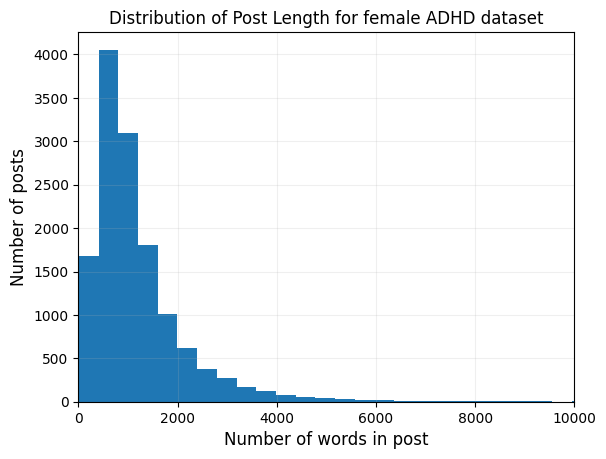

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(post_length_df, bins=40)
plt.title('Distribution of Post Length for female ADHD dataset', fontsize=12)
plt.xlabel('Number of words in post', fontsize=12)
plt.ylabel('Number of posts', fontsize=12)
plt.grid(alpha=0.2)
plt.xlim(0,10000)

plt.show()

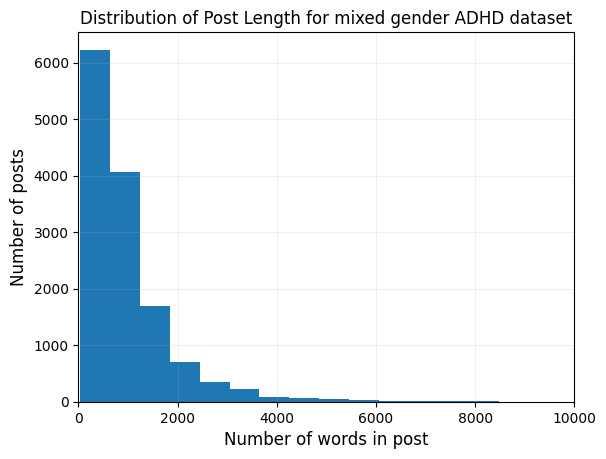

In [ ]:
plt.hist(post_length_df_mixed, bins=40)
plt.title('Distribution of Post Length for mixed gender ADHD dataset', fontsize=12)
plt.xlabel('Number of words in post', fontsize=12)
plt.ylabel('Number of posts', fontsize=12)
plt.grid(alpha=0.2)
plt.xlim(0,10000)

plt.show()

# 2. MODELLING DATA

In [ ]:
pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 99.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 118.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 79.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 83.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 83.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

# ****r/adhdwomen Dataset****

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
from umap import UMAP
from bertopic.vectorizers import ClassTfidfTransformer
from sklearn.decomposition import PCA
from hdbscan import HDBSCAN

ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True, bm25_weighting=True)

hdbscan_model = HDBSCAN(min_cluster_size=50, metric='euclidean',
                        cluster_selection_method='eom', prediction_data=True, min_samples=5)

umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42, low_memory=False)

# Define stop word list

stop_words = [
        "a",
        "about",
        "above",
        "across",
        "after",
        "afterwards",
        "again",
        "against",
        "all",
        "almost",
        "alone",
        "along",
        "already",
        "also",
        "although",
        "always",
        "am",
        "among",
        "amongst",
        "amoungst",
        "amount",
        "an",
        "and",
        "another",
        "any",
        "anyhow",
        "anyone",
        "anything",
        "anyway",
        "anywhere",
        "are",
        "around",
        "as",
        "at",
        "back",
        "be",
        "became",
        "because",
        "become",
        "becomes",
        "becoming",
        "been",
        "before",
        "beforehand",
        "behind",
        "being",
        "below",
        "beside",
        "besides",
        "between",
        "beyond",
        "bill",
        "both",
        "bottom",
        "but",
        "by",
        "call",
        "can",
        "cannot",
        "cant",
        "co",
        "con",
        "could",
        "couldnt",
        "cry",
        "de",
        "describe",
        "detail",
        "do",
        "done",
        "down",
        "due",
        "during",
        "each",
        "eg",
        "eight",
        "either",
        "eleven",
        "else",
        "elsewhere",
        "empty",
        "enough",
        "etc",
        "even",
        "ever",
        "every",
        "everyone",
        "everything",
        "everywhere",
        "except",
        "few",
        "fifteen",
        "fifty",
        "fill",
        "find",
        "fire",
        "first",
        "five",
        "for",
        "former",
        "formerly",
        "forty",
        "found",
        "four",
        "from",
        "front",
        "full",
        "further",
        "get",
        "give",
        "go",
        "had",
        "has",
        "hasnt",
        "have",
        "he",
        "hence",
        "her",
        "here",
        "hereafter",
        "hereby",
        "herein",
        "hereupon",
        "hers",
        "herself",
        "him",
        "himself",
        "his",
        "how",
        "however",
        "hundred",
        "i",
        "ie",
        "if",
        "in",
        "inc",
        "indeed",
        "interest",
        "into",
        "is",
        "it",
        "its",
        "itself",
        "keep",
        "last",
        "latter",
        "latterly",
        "least",
        "less",
        "ltd",
        "made",
        "many",
        "may",
        "me",
        "meanwhile",
        "might",
        "mill",
        "mine",
        "more",
        "moreover",
        "most",
        "mostly",
        "move",
        "much",
        "must",
        "my",
        "myself",
        "name",
        "namely",
        "neither",
        "never",
        "nevertheless",
        "next",
        "nine",
        "no",
        "nobody",
        "none",
        "noone",
        "nor",
        "not",
        "nothing",
        "now",
        "nowhere",
        "of",
        "off",
        "often",
        "on",
        "once",
        "one",
        "only",
        "onto",
        "or",
        "other",
        "others",
        "otherwise",
        "our",
        "ours",
        "ourselves",
        "out",
        "over",
        "own",
        "part",
        "per",
        "perhaps",
        "please",
        "put",
        "rather",
        "re",
        "same",
        "see",
        "seem",
        "seemed",
        "seeming",
        "seems",
        "serious",
        "several",
        "she",
        "should",
        "show",
        "side",
        "since",
        "sincere",
        "six",
        "sixty",
        "so",
        "some",
        "somehow",
        "someone",
        "something",
        "sometime",
        "sometimes",
        "somewhere",
        "still",
        "such",
        "system",
        "take",
        "ten",
        "than",
        "that",
        "the",
        "their",
        "them",
        "themselves",
        "then",
        "thence",
        "there",
        "thereafter",
        "thereby",
        "therefore",
        "therein",
        "thereupon",
        "these",
        "they",
        "thick",
        "thin",
        "third",
        "this",
        "those",
        "though",
        "three",
        "through",
        "throughout",
        "thru",
        "thus",
        "to",
        "together",
        "too",
        "top",
        "toward",
        "towards",
        "twelve",
        "twenty",
        "two",
        "un",
        "under",
        "until",
        "up",
        "upon",
        "us",
        "very",
        "via",
        "was",
        "we",
        "well",
        "were",
        "what",
        "whatever",
        "when",
        "whence",
        "whenever",
        "where",
        "whereafter",
        "whereas",
        "whereby",
        "wherein",
        "whereupon",
        "wherever",
        "whether",
        "which",
        "while",
        "whither",
        "who",
        "whoever",
        "whole",
        "whom",
        "whose",
        "why",
        "will",
        "with",
        "within",
        "without",
        "would",
        "yet",
        "you",
        "your",
        "yours",
        "yourself",
        "yourselves",
    ]


stop_words.extend(['from', 'm', 'subject', 're', 'edu', 'use', 'not', 'would', 'https', 'com', 'one', 'things',
                       'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'got', 'do', 'done', 'try', 'many',
                       'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make',
                       'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come',
                       'like', 'always', 'really', 'anyone', 'adhd', 'something', 'much', 'im', 'told', 'said', 'still',
                       'started', 'going', 'never', 'since', 'else', 'start', 'today', 'u', 'getting', 'start', 'started', 'way',
                       'sometimes', 'way', 'anything', 'thing', 've', 'day', 'everything', 'thing', 'just', 'doing', 'don'])

# Filter for stopwords
vectorizer_model = CountVectorizer(stop_words=stop_words)

In [ ]:
from bertopic import BERTopic

topic_model = BERTopic(ctfidf_model=ctfidf_model, umap_model=umap_model, hdbscan_model=hdbscan_model, embedding_model='all-mpnet-base-v2', vectorizer_model=vectorizer_model)

topics, probs = topic_model.fit_transform(sentence_list)
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,5312,-1_depression_felt_self_diagnosis,"[depression, felt, self, diagnosis, thought, a...","[New here, mostly a word-vomit into the void b..."
1,0,452,0_semester_classes_college_class,"[semester, classes, college, class, exam, assi...","[ANY advice, insight, or guidance would be so ..."
2,1,409,1_job_career_jobs_boss,"[job, career, jobs, boss, manager, company, fi...",[Workplace Accommodations- should you? (A stor...
3,2,386,2_task_tasks_project_home,"[task, tasks, project, home, projects, working...","[When every little thing seems like ""too much ..."
4,3,382,3_forget_constantly_attention_distracted,"[forget, constantly, attention, distracted, cl...","[Not sure if I'm struggling with ADHD, but it ..."
5,4,356,4_vyvanse_30mg_elvanse_40mg,"[vyvanse, 30mg, elvanse, 40mg, dose, 20mg, 50m...",[Week Five on Vyvanse--My Experience So Far Hi...
6,5,320,5_eat_eating_food_weight,"[eat, eating, food, weight, appetite, meal, me...","[I feel distressed about food daily, I wish I ..."
7,6,313,6_psychiatrist_appointment_doctor_therapist,"[psychiatrist, appointment, doctor, therapist,...",[Approaching current psych about ADHD assessme...
8,7,312,7_finally_officially_relieved_excited,"[finally, officially, relieved, excited, valid...",[I AM OFFICIALLY DIAGNOSED!!! After a decade o...
9,8,246,8_adderall_xr_10mg_dose,"[adderall, xr, 10mg, dose, 5mg, 15mg, mg, effe...","[I need my meds to make good decisions, but wh..."


*Parameter tuning*

In [ ]:
# Load saved model

topic_model = load_model('BERTopic_model_adhdwomen_stop_words.pkl')

https://github.com/MaartenGr/BERTopic/issues/283

https://github.com/MaartenGr/BERTopic/issues/90

In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

# Reduce topics from 50-5 with a step of 5 and calculate coherence score for each number of topics.
# N.B. nr_topics is 1 greater than desired number due to outlier topics. To reduce model to 25 topics, nr_topics=26

coherence_female = []
for nr_topics in list(reversed(range(6, 52)))[::5]:

  topic_model.reduce_topics(sentence_list, nr_topics=nr_topics)

  # Calculate the topics and topic probabilities for the coherence score

  topics = topic_model._map_predictions(topic_model.hdbscan_model.labels_)
  probs = topic_model.hdbscan_model.probabilities_

  # Calculate coherence score for different topic numbers

  # Preprocess documents
  cleaned_docs = topic_model._preprocess_text(sentence_list)

  # Extract vectorizer and tokenizer from BERTopic
  vectorizer = topic_model.vectorizer_model
  tokenizer = vectorizer.build_tokenizer()

  # Extract features for Topic Coherence evaluation
  words = vectorizer.get_feature_names_out()
  tokens = [tokenizer(doc) for doc in cleaned_docs]
  dictionary = corpora.Dictionary(tokens)
  corpus = [dictionary.doc2bow(token) for token in tokens]
  topic_words = [[words for words, _ in topic_model.get_topic(topic)]
                for topic in range(len(set(topics))-1)]

  # Evaluate
  coherence_model = CoherenceModel(topics=topic_words,
                                  texts=tokens,
                                  corpus=corpus,
                                  dictionary=dictionary,
                                  coherence='c_npmi')
  coherence = coherence_model.get_coherence()
  coherence_female.append(coherence)

  # Print coherence score
  print(f"Num topics: {nr_topics},  Coherence score: {coherence}\n")

Num topics: 51,  Coherence score: 0.005349524030789327

Num topics: 46,  Coherence score: 0.018209347055217463

Num topics: 41,  Coherence score: 0.02448654849480384

Num topics: 36,  Coherence score: 0.025779331661752978

Num topics: 31,  Coherence score: 0.034391916398115875

Num topics: 26,  Coherence score: 0.04033350261524513

Num topics: 21,  Coherence score: 0.04034880792999292

Num topics: 16,  Coherence score: 0.07052813543405409

Num topics: 11,  Coherence score: 0.04789431790874711

Num topics: 6,  Coherence score: 0.04292803222673772



In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,5425,-1_life_diagnosed_work_people,"[life, diagnosed, work, people, diagnosis, tim...","[Tick most of the boxes, but not all of them....."
1,0,1882,0_diagnosis_symptoms_psychiatrist_appointment,"[diagnosis, symptoms, psychiatrist, appointmen...",[So my family doc (who I've had since I was 4)...
2,1,1663,1_vyvanse_adderall_dose_meds,"[vyvanse, adderall, dose, meds, taking, effect...",[My Experiences With Lexapro and Vyvanse I was...
3,2,1014,2_job_career_work_jobs,"[job, career, work, jobs, school, classes, col...",[Jobs/careers for people with ADD/inattentive ...
4,3,655,3_relationship_rsd_friends_relationships,"[relationship, rsd, friends, relationships, re...",[any advice for emotional dysregulation and me...
5,4,507,4_clean_cleaning_laundry_room,"[clean, cleaning, laundry, room, clothes, hous...",[One little thing Howdy\n\nIve been working wi...
6,5,439,5_finally_proud_share_happy,"[finally, proud, share, happy, excited, reliev...",[A tiny victory I'd like to share I hate docto...
7,6,334,6_talking_hyperfocus_thoughts_memory,"[talking, hyperfocus, thoughts, memory, rememb...",[Tips for reigning in excessive talking? Hi al...
8,7,310,7_eat_eating_food_weight,"[eat, eating, food, weight, appetite, meal, me...","[Sugar cravings, running, and Adderall: Q’s se..."
9,8,229,8_hair_skin_teeth_nails,"[hair, skin, teeth, nails, wear, brushing, fid...",[How do you do your hair/makeup for the gym an...


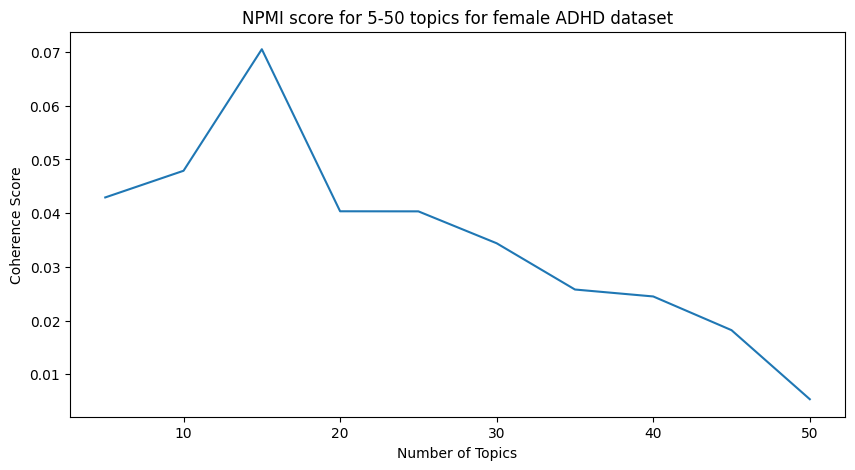

In [ ]:
# visualize coherence
plt.figure(figsize=(10,5))
plt.plot(list(reversed(range(5, 51)))[::5], coherence_female)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title('NPMI score for 5-50 topics for female ADHD dataset', fontsize=12)
plt.show()


**Final model**

In [ ]:
# Load saved model

topic_model = load_model('BERTopic_model_adhdwomen_stop_words.pkl')
topic_model.reduce_topics(sentence_list, nr_topics=20)

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,5326,-1_life_diagnosed_diagnosis_work,"[life, diagnosed, diagnosis, work, people, anx...",[Diagnosed in 2020 at 26 years old. ICU nurse ...
1,0,1882,0_diagnosis_symptoms_psychiatrist_appointment,"[diagnosis, symptoms, psychiatrist, appointmen...",[So my family doc (who I've had since I was 4)...
2,1,1663,1_vyvanse_adderall_dose_meds,"[vyvanse, adderall, dose, meds, taking, effect...",[My Experiences With Lexapro and Vyvanse I was...
3,2,1014,2_job_career_work_jobs,"[job, career, work, jobs, school, classes, col...",[Jobs/careers for people with ADD/inattentive ...
4,3,655,3_relationship_rsd_friends_relationships,"[relationship, rsd, friends, relationships, re...",[any advice for emotional dysregulation and me...
5,4,507,4_clean_cleaning_laundry_room,"[clean, cleaning, laundry, room, clothes, hous...",[One little thing Howdy\n\nIve been working wi...
6,5,439,5_finally_proud_share_happy,"[finally, proud, share, happy, relieved, excit...","[A crappy, overpriced frozen dinner saved me t..."
7,6,334,6_talking_hyperfocus_thoughts_memory,"[talking, hyperfocus, thoughts, memory, rememb...",[Tips for reigning in excessive talking? Hi al...
8,7,310,7_eat_eating_food_weight,"[eat, eating, food, weight, appetite, meal, me...","[Sugar cravings, running, and Adderall: Q’s se..."
9,8,229,8_hair_skin_teeth_nails,"[hair, skin, teeth, nails, brushing, wear, fid...",[How do you do your hair/makeup for the gym an...


In [ ]:
# Merge Topic 15 to -1 (outliers) as it contained promotional posts that were missed during data cleaning

topics_to_merge = [-1, 15]
topic_model.merge_topics(sentence_list, topics_to_merge)

In [ ]:
# Save model

save_model(topic_model, 'BERTopic_model_adhdwomen_FINAL_.pkl')

'/content/drive/MyDrive/MScProject/BERTopic_model_adhdwomen_FINAL.pkl'

In [ ]:
# Load model

topic_model = load_model('BERTopic_model_adhdwomen_FINAL.pkl')

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,5425,-1_life_diagnosed_work_people,"[life, diagnosed, work, people, diagnosis, tim...","[Tick most of the boxes, but not all of them....."
1,0,1882,0_diagnosis_symptoms_psychiatrist_appointment,"[diagnosis, symptoms, psychiatrist, appointmen...",[So my family doc (who I've had since I was 4)...
2,1,1663,1_vyvanse_adderall_dose_meds,"[vyvanse, adderall, dose, meds, taking, effect...",[My Experiences With Lexapro and Vyvanse I was...
3,2,1014,2_job_career_work_jobs,"[job, career, work, jobs, school, classes, col...",[Jobs/careers for people with ADD/inattentive ...
4,3,655,3_relationship_rsd_friends_relationships,"[relationship, rsd, friends, relationships, re...",[any advice for emotional dysregulation and me...
5,4,507,4_clean_cleaning_laundry_room,"[clean, cleaning, laundry, room, clothes, hous...",[One little thing Howdy\n\nIve been working wi...
6,5,439,5_finally_proud_share_happy,"[finally, proud, share, happy, excited, reliev...",[A tiny victory I'd like to share I hate docto...
7,6,334,6_talking_hyperfocus_thoughts_memory,"[talking, hyperfocus, thoughts, memory, rememb...",[Tips for reigning in excessive talking? Hi al...
8,7,310,7_eat_eating_food_weight,"[eat, eating, food, weight, appetite, meal, me...","[Sugar cravings, running, and Adderall: Q’s se..."
9,8,229,8_hair_skin_teeth_nails,"[hair, skin, teeth, nails, wear, brushing, fid...",[How do you do your hair/makeup for the gym an...


In [ ]:
topic_model.visualize_barchart(top_n_topics=18)

# ****r/ADHD Dataset****

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
from umap import UMAP
from bertopic.vectorizers import ClassTfidfTransformer
from sklearn.decomposition import PCA
from hdbscan import HDBSCAN

ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True, bm25_weighting=True)

hdbscan_model = HDBSCAN(min_cluster_size=50, metric='euclidean',
                        cluster_selection_method='eom', prediction_data=True, min_samples=5)

umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42, low_memory=False)

# Define stop word list

stop_words = [
        "a","about", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also",
        "although", "always", "am", "among", "amongst", "amoungst", "amount",
        "an", "and", "another", "any", "anyhow",
          "anyone",
          "anything",
          "anyway",
          "anywhere",
          "are",
          "around",
          "as",
          "at",
          "back",
          "be",
          "became",
          "because",
        "become",
        "becomes",
        "becoming",
        "been",
        "before",
        "beforehand",
        "behind",
        "being",
        "below",
        "beside",
        "besides",
        "between",
        "beyond",
        "bill",
        "both",
        "bottom",
        "but",
        "by",
        "call",
        "can",
        "cannot",
        "cant",
        "co",
        "con",
        "could",
        "couldnt",
        "cry",
        "de",
        "describe",
        "detail",
        "do",
        "done",
        "down",
        "due",
        "during",
        "each",
        "eg",
        "eight",
        "either",
        "eleven",
        "else",
        "elsewhere",
        "empty",
        "enough",
        "etc",
        "even",
        "ever",
        "every",
        "everyone",
        "everything",
        "everywhere",
        "except",
        "few",
        "fifteen",
        "fifty",
        "fill",
        "find",
        "fire",
        "first",
        "five",
        "for",
        "former",
        "formerly",
        "forty",
        "found",
        "four",
        "from",
        "front",
        "full",
        "further",
        "get",
        "give",
        "go",
        "had",
        "has",
        "hasnt",
        "have",
        "he",
        "hence",
        "her",
        "here",
        "hereafter",
        "hereby",
        "herein",
        "hereupon",
        "hers",
        "herself",
        "him",
        "himself",
        "his",
        "how",
        "however",
        "hundred",
        "i",
        "ie",
        "if",
        "in",
        "inc",
        "indeed",
        "interest",
        "into",
        "is",
        "it",
        "its",
        "itself",
        "keep",
        "last",
        "latter",
        "latterly",
        "least",
        "less",
        "ltd",
        "made",
        "many",
        "may",
        "me",
        "meanwhile",
        "might",
        "mill",
        "mine",
        "more",
        "moreover",
        "most",
        "mostly",
        "move",
        "much",
        "must",
        "my",
        "myself",
        "name",
        "namely",
        "neither",
        "never",
        "nevertheless",
        "next",
        "nine",
        "no",
        "nobody",
        "none",
        "noone",
        "nor",
        "not",
        "nothing",
        "now",
        "nowhere",
        "of",
        "off",
        "often",
        "on",
        "once",
        "one",
        "only",
        "onto",
        "or",
        "other",
        "others",
        "otherwise",
        "our",
        "ours",
        "ourselves",
        "out",
        "over",
        "own",
        "part",
        "per",
        "perhaps",
        "please",
        "put",
        "rather",
        "re",
        "same",
        "see",
        "seem",
        "seemed",
        "seeming",
        "seems",
        "serious",
        "several",
        "she",
        "should",
        "show",
        "side",
        "since",
        "sincere",
        "six",
        "sixty",
        "so",
        "some",
        "somehow",
        "someone",
        "something",
        "sometime",
        "sometimes",
        "somewhere",
        "still",
        "such",
        "system",
        "take",
        "ten",
        "than",
        "that",
        "the",
        "their",
        "them",
        "themselves",
        "then",
        "thence",
        "there",
        "thereafter",
        "thereby",
        "therefore",
        "therein",
        "thereupon",
        "these",
        "they",
        "thick",
        "thin",
        "third",
        "this",
        "those",
        "though",
        "three",
        "through",
        "throughout",
        "thru",
        "thus",
        "to",
        "together",
        "too",
        "top",
        "toward",
        "towards",
        "twelve",
        "twenty",
        "two",
        "un",
        "under",
        "until",
        "up",
        "upon",
        "us",
        "very",
        "via",
        "was",
        "we",
        "well",
        "were",
        "what",
        "whatever",
        "when",
        "whence",
        "whenever",
        "where",
        "whereafter",
        "whereas",
        "whereby",
        "wherein",
        "whereupon",
        "wherever",
        "whether",
        "which",
        "while",
        "whither",
        "who",
        "whoever",
        "whole",
        "whom",
        "whose",
        "why",
        "will",
        "with",
        "within",
        "without",
        "would",
        "yet",
        "you",
        "your",
        "yours",
        "yourself",
        "yourselves",
    ]



stop_words.extend(['from', 'm', 'subject', 're', 'edu', 'use', 'not', 'would', 'https', 'com', 'one', 'things',
                       'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'got', 'do', 'done', 'try', 'many',
                       'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make',
                       'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come',
                       'like', 'always', 'really', 'anyone', 'adhd', 'something', 'much', 'im', 'told', 'said', 'still',
                       'started', 'going', 'never', 'since', 'else', 'start', 'today', 'u', 'getting', 'start', 'started', 'way',
                       'sometimes', 'way', 'anything', 'thing', 've', 'day', 'everything', 'thing', 'just', 'doing', 'aaaaaaaaaaaaaaaaaaaaaaaa', 'ir', 'steven', 'beth'])


vectorizer_model = CountVectorizer(stop_words=stop_words)



In [ ]:
# Topic model for r/adhd dataset

from bertopic import BERTopic

topic_model_mixed = BERTopic(ctfidf_model=ctfidf_model, umap_model=umap_model, hdbscan_model=hdbscan_model, embedding_model='all-mpnet-base-v2', vectorizer_model=vectorizer_model)

topics, probs = topic_model_mixed.fit_transform(sentence_list_ADHD)
topic_model_mixed.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,5689,-1_class_brain_shit_self,"[class, brain, shit, self, home, feeling, anxi...","[Rock Bottom (tl;dr: I've ruined my own life, ..."
1,0,525,0_psychiatrist_appointment_gp_diagnosis,"[psychiatrist, appointment, gp, diagnosis, tes...",[Those of you who went to see a professional a...
2,1,462,1_relationship_son_partner_dating,"[relationship, son, partner, dating, relations...",[Issue with an friend who also has ADHD I have...
3,2,396,2_vyvanse_30mg_50mg_mg,"[vyvanse, 30mg, 50mg, mg, effects, elvanse, do...","[Vyvanse: desired effects, (weird) side effect..."
4,3,306,3_app_apps_calendar_android,"[app, apps, calendar, android, reminders, appl...",[Self-help book success stories? **Main questi...
5,4,260,4_adderall_xr_15mg_dose,"[adderall, xr, 15mg, dose, 10mg, 20mg, toleran...",[A MONTH ON ADDERALL ***Seeing The Light***\n\...
6,5,260,5_meds_medication_ritalin_medications,"[meds, medication, ritalin, medications, takin...",[Diagnosed and began medication (somewhat) rec...
7,6,250,6_finally_sub_subreddit_community,"[finally, sub, subreddit, community, posts, re...",[This sub is making me cry! This sub makes me ...
8,7,250,7_clean_laundry_cleaning_dishes,"[clean, laundry, cleaning, dishes, room, cloth...",[Anxiety building over housecleaning with a de...
9,8,241,8_eat_eating_food_weight,"[eat, eating, food, weight, appetite, meal, hu...",[Many meal prepping strategies haven't worked ...


In [ ]:
# Save initial model

save_model(topic_model_mixed, 'BERTopic_model_mixed_update_23.pkl')

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


'/content/drive/MyDrive/MScProject/BERTopic_model_mixed_update_23.pkl'

*Parameter tuning*

In [ ]:
# Load saved model

topic_model_mixed = load_model('BERTopic_model_mixed_update_23.pkl')

https://github.com/MaartenGr/BERTopic/issues/283

https://github.com/MaartenGr/BERTopic/issues/90

In [ ]:
import gensim

import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

# Reduce topics from 50-5 with a step of 5 and calculate coherence score for each number of topics.
# N.B. nr_topics is 1 greater than desired number due to outlier topics. To reduce model to 50 topics, nr_topics=51

coherence_mixed = []
for nr_topics in list(reversed(range(6, 52)))[::5]:

  topic_model_mixed.reduce_topics(sentence_list_ADHD, nr_topics=nr_topics)

  topics = topic_model_mixed._map_predictions(topic_model_mixed.hdbscan_model.labels_)

  probs = topic_model_mixed.hdbscan_model.probabilities_

  # Preprocess documents
  cleaned_docs = topic_model_mixed._preprocess_text(sentence_list_ADHD)

  # Extract vectorizer and tokenizer from BERTopic
  vectorizer = topic_model_mixed.vectorizer_model
  tokenizer = vectorizer.build_tokenizer()

  # Extract features for Topic Coherence evaluation
  words = vectorizer.get_feature_names_out()
  tokens = [tokenizer(doc) for doc in cleaned_docs]
  dictionary = corpora.Dictionary(tokens)
  corpus = [dictionary.doc2bow(token) for token in tokens]
  topic_words = [[words for words, _ in topic_model_mixed.get_topic(topic)]
                for topic in range(len(set(topics))-1)]

  # Evaluate
  coherence_model = CoherenceModel(topics=topic_words,
                                  texts=tokens,
                                  corpus=corpus,
                                  dictionary=dictionary,
                                  coherence='c_npmi')
  coherence = coherence_model.get_coherence()
  coherence_mixed.append(coherence)

  # Print coherence score
  print(f"Num topics: {nr_topics},  Coherence score: {coherence}\n")

Num topics: 51,  Coherence score: -0.0015649467812910139

Num topics: 46,  Coherence score: 0.004772422333646909

Num topics: 41,  Coherence score: 0.01878038534096122

Num topics: 36,  Coherence score: 0.029850618511363627

Num topics: 31,  Coherence score: 0.027649304674045368

Num topics: 26,  Coherence score: 0.050010846659983434

Num topics: 21,  Coherence score: 0.06551741182224653

Num topics: 16,  Coherence score: 0.062494170582258854

Num topics: 11,  Coherence score: 0.019814359985394027

Num topics: 6,  Coherence score: -0.023895719050513794



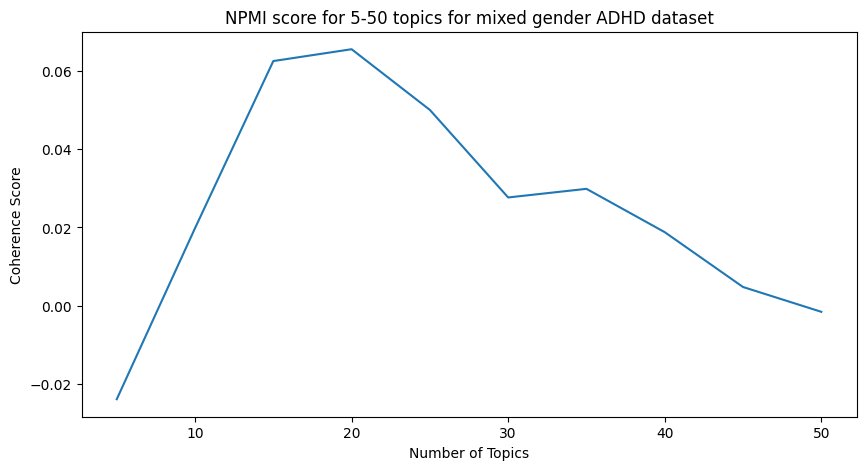

In [ ]:
from matplotlib import pyplot as plt

# visualize coherence
plt.figure(figsize=(10,5))
plt.plot(list(reversed(range(5, 51)))[::5],coherence_mixed)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("NPMI score for 5-50 topics for mixed gender ADHD dataset", fontsize=12)
plt.show()

In [ ]:
# Load saved model

topic_model_mixed = load_model('BERTopic_model_mixed_update_23.pkl')

https://github.com/MaartenGr/BERTopic/issues/283

https://github.com/MaartenGr/BERTopic/issues/90

In [ ]:
import gensim

import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

# Reduce topics from 20-10 with a step of 1 and calculate coherence score for each number of topics.
# N.B. nr_topics is 1 greater than desired number due to outlier topics. To reduce model to 50 topics, nr_topics=51

coherence_topics = []
for nr_topics in list(reversed(range(11, 22)))[::1]:

  topic_model_mixed.reduce_topics(sentence_list_ADHD, nr_topics=nr_topics)

  topics = topic_model_mixed._map_predictions(topic_model_mixed.hdbscan_model.labels_)

  probs = topic_model_mixed.hdbscan_model.probabilities_

  # Preprocess documents
  cleaned_docs = topic_model_mixed._preprocess_text(sentence_list_ADHD)

  # Extract vectorizer and tokenizer from BERTopic
  vectorizer = topic_model_mixed.vectorizer_model
  tokenizer = vectorizer.build_tokenizer()

  # Extract features for Topic Coherence evaluation
  words = vectorizer.get_feature_names_out()
  tokens = [tokenizer(doc) for doc in cleaned_docs]
  dictionary = corpora.Dictionary(tokens)
  corpus = [dictionary.doc2bow(token) for token in tokens]
  topic_words = [[words for words, _ in topic_model_mixed.get_topic(topic)]
                for topic in range(len(set(topics))-1)]

  # Evaluate
  coherence_model = CoherenceModel(topics=topic_words,
                                  texts=tokens,
                                  corpus=corpus,
                                  dictionary=dictionary,
                                  coherence='c_npmi')
  coherence = coherence_model.get_coherence()
  coherence_topics.append(coherence)

  # Print coherence score
  print(f"Num topics: {nr_topics},  Coherence score: {coherence}\n")

Num topics: 21,  Coherence score: 0.07613711908344213

Num topics: 20,  Coherence score: 0.07196048338709005

Num topics: 19,  Coherence score: 0.06597593096090579

Num topics: 18,  Coherence score: 0.0666375006879319

Num topics: 17,  Coherence score: 0.07531240031644587

Num topics: 16,  Coherence score: 0.08099692741029854

Num topics: 15,  Coherence score: 0.07891661252062077

Num topics: 14,  Coherence score: 0.07782311192212245

Num topics: 13,  Coherence score: 0.07590243746212055

Num topics: 12,  Coherence score: 0.07098058098770493

Num topics: 11,  Coherence score: 0.06395497874598025



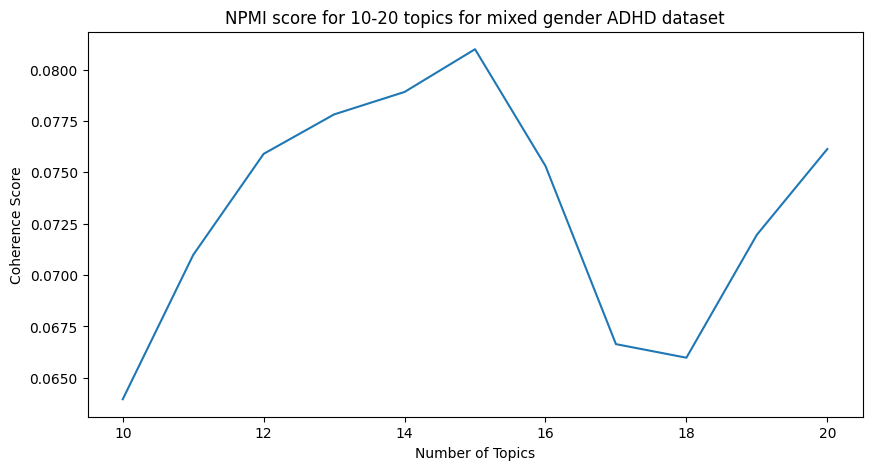

In [ ]:
# visualize coherence
plt.figure(figsize=(10,5))
plt.plot(list(reversed(range(10, 21)))[::1],coherence_topics)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("NPMI score for 10-20 topics for mixed gender ADHD dataset", fontsize=12)
plt.show()

In [ ]:
# Inspect models with nr_topics=15 and 20

# Load saved model

topic_model_mixed = load_model('BERTopic_model_mixed_update_23.pkl')

In [ ]:
topic_model_mixed.reduce_topics(sentence_list_ADHD, nr_topics=21)


In [ ]:
topic_model_mixed.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,5689,-1_life_work_people_school,"[life, work, people, school, medication, diagn...","[Rock Bottom (tl;dr: I've ruined my own life, ..."
1,0,1750,0_diagnosis_psychiatrist_diagnosed_help,"[diagnosis, psychiatrist, diagnosed, help, sym...",[My ADHD and Me tl;dr went untreated until I w...
2,1,1479,1_vyvanse_adderall_dose_effects,"[vyvanse, adderall, dose, effects, concerta, t...",[My experience in finding the right medication...
3,2,954,2_app_apps_games_tasks,"[app, apps, games, tasks, task, phone, timer, ...",[Self-help book success stories? **Main questi...
4,3,683,3_study_job_classes_semester,"[study, job, classes, semester, college, exam,...",[Got fired for being tardy too many times... A...
5,4,482,4_finally_proud_happy_sub,"[finally, proud, happy, sub, community, subred...",[So glad I found you guys. Heres a bit of a ve...
6,5,298,5_memory_talking_words_thoughts,"[memory, talking, words, thoughts, remember, c...",[Is a ball gag professional? I feel like this ...
7,6,265,6_pharmacy_prescription_insurance_script,"[pharmacy, prescription, insurance, script, do...",[I got a firsthand look into how little insura...
8,7,250,7_clean_laundry_cleaning_dishes,"[clean, laundry, cleaning, dishes, room, cloth...",[ADHD Hacks for a Clean House Room: How I beca...
9,8,241,8_eat_eating_food_weight,"[eat, eating, food, weight, appetite, hungry, ...",[Many meal prepping strategies haven't worked ...


In [ ]:
# Save final model

save_model(topic_model_mixed, 'BERTopic_model_mixed_FINAL_20.pkl')

'/content/drive/MyDrive/MScProject/BERTopic_model_mixed_FINAL_20.pkl'

In [ ]:
topics = list(reversed(range(5, 51, 5)))

In [ ]:
print(topics)

[50, 45, 40, 35, 30, 25, 20, 15, 10, 5]


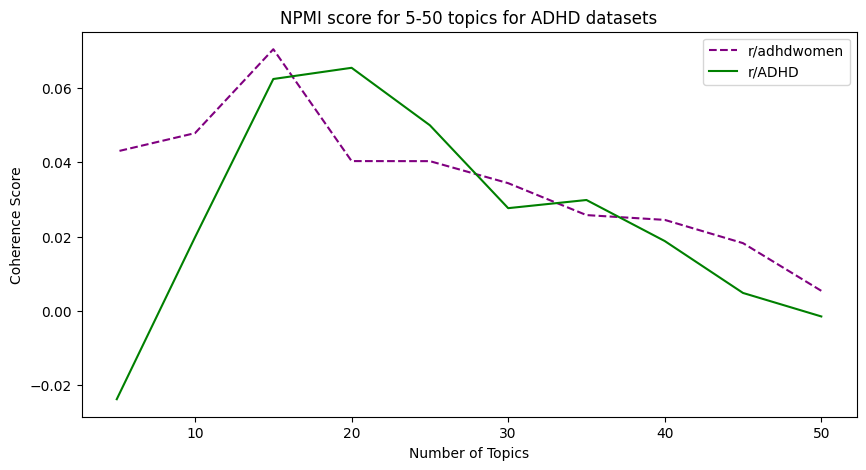

In [ ]:
topics = list(reversed(range(5, 51, 5)))

# plt.plot(list(reversed(range(5, 51)))[::5]

df = pd.DataFrame({'topics': topics,
                   'r/adhdwomen': coherence_female,
                   'r/ADHD': coherence_mixed })
df

# visualize coherence
plt.figure(figsize=(10,5))
plt.plot(list(reversed(range(5,51,5))),df['r/adhdwomen'], label='r/adhdwomen', color='purple', linestyle='dashed')
plt.plot(list(reversed(range(5,51,5))),df['r/ADHD'], label='r/ADHD', color='green')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("NPMI score for 5-50 topics for ADHD datasets", fontsize=12)
plt.legend()
plt.show()

**Final model**

In [ ]:
latest_model_mixed = load_model('BERTopic_model_mixed_FINAL_20.pkl')

In [ ]:
latest_model_mixed.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,5689,-1_life_work_people_school,"[life, work, people, school, medication, diagn...","[Rock Bottom (tl;dr: I've ruined my own life, ..."
1,0,1750,0_diagnosis_psychiatrist_diagnosed_help,"[diagnosis, psychiatrist, diagnosed, help, sym...",[My ADHD and Me tl;dr went untreated until I w...
2,1,1479,1_vyvanse_adderall_dose_effects,"[vyvanse, adderall, dose, effects, concerta, t...",[My experience in finding the right medication...
3,2,954,2_app_apps_games_tasks,"[app, apps, games, tasks, task, phone, timer, ...",[Self-help book success stories? **Main questi...
4,3,683,3_study_job_classes_semester,"[study, job, classes, semester, college, exam,...",[Got fired for being tardy too many times... A...
5,4,482,4_finally_proud_happy_sub,"[finally, proud, happy, sub, community, subred...",[So glad I found you guys. Heres a bit of a ve...
6,5,298,5_memory_talking_words_thoughts,"[memory, talking, words, thoughts, remember, c...",[Is a ball gag professional? I feel like this ...
7,6,265,6_pharmacy_prescription_insurance_script,"[pharmacy, prescription, insurance, script, do...",[I got a firsthand look into how little insura...
8,7,250,7_clean_laundry_cleaning_dishes,"[clean, laundry, cleaning, dishes, room, cloth...",[ADHD Hacks for a Clean House Room: How I beca...
9,8,241,8_eat_eating_food_weight,"[eat, eating, food, weight, appetite, hungry, ...",[Many meal prepping strategies haven't worked ...


In [ ]:
latest_model_mixed.visualize_barchart(top_n_topics=20)

In [ ]:
latest_model_mixed.topic_representations_

{-1: [('life', 0.16983862135959366),
  ('work', 0.16847060041697373),
  ('people', 0.1654653487735249),
  ('school', 0.1638398323746061),
  ('medication', 0.15842553451930427),
  ('diagnosed', 0.15831924225879415),
  ('didn', 0.15822248557710586),
  ('feel', 0.15760225627252752),
  ('brain', 0.1566957186267461),
  ('did', 0.15648116483065552)],
 0: [('diagnosis', 0.2155221511151367),
  ('psychiatrist', 0.20293671410765665),
  ('diagnosed', 0.1985971950373054),
  ('help', 0.19654445147211602),
  ('symptoms', 0.19586343273510168),
  ('parents', 0.1880514243769548),
  ('appointment', 0.18747032674834035),
  ('school', 0.18461915982730046),
  ('relationship', 0.184192646615538),
  ('doctor', 0.18164268810005443)],
 1: [('vyvanse', 0.34197241270720413),
  ('adderall', 0.2876178463603587),
  ('dose', 0.27632378136409796),
  ('effects', 0.27117952326706396),
  ('concerta', 0.26743012374187397),
  ('taking', 0.2646689408474182),
  ('ritalin', 0.2623706175726214),
  ('medication', 0.24453338337

# 3. EXPERIMENTS

**r/adhdwomen female dataset**

In [ ]:
# Retrieve the c-TF-IDF scores

ctfidf = pd.DataFrame(topic_model.c_tf_idf_.toarray())

In [ ]:
# Topic number along the x axis and term along the y axis. Topic numbers begin at 0, rather than -1

df_final = ctfidf.T
df_final

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.048072,0.039070,0.074641,0.075060,0.0,0.0,0.044629,0.000000,0.046743,0.0,0.000000,0.0,0.071592,0.0,0.0,0.081261,0.112422,0.0,0.0
1,0.049474,0.029101,0.036397,0.053307,0.0,0.0,0.105121,0.053428,0.000000,0.0,0.084963,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
2,0.020420,0.000000,0.028105,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
3,0.015700,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
4,0.021128,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31803,0.000000,0.024433,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
31804,0.000000,0.024433,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
31805,0.000000,0.024433,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
31806,0.000000,0.000000,0.030559,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0


**Hypotheses relating to 'diagnosis'**

In [ ]:
# Find the 5 topics most similar to 'diagnosis' (topic -1 are outliers so excluded)

similar_topics, similarity = topic_model.find_topics("diagnosis", top_n=6)
print(similar_topics)

[0, -1, 5, 6, 1, 2]


In [ ]:
# Check each topic for relevance

topic_model.get_representative_docs(topic=0)

In [ ]:
topic_model.get_topic(similar_topics[3])

[('discord', 0.6769020641126741),
 ('accountability', 0.6130838341781931),
 ('group', 0.5522505753232257),
 ('chat', 0.5149497915115465),
 ('zoom', 0.48072041492091483),
 ('server', 0.48019683053137324),
 ('groups', 0.4793704609674696),
 ('join', 0.47378411396133935),
 ('support', 0.46784398800953364),
 ('buddy', 0.4474451587488692)]

In [ ]:
# Create a dataframe with the 5 most similar topics to 'diagnosis'
# N.B. the topic numbers in the c-TF-IDF scores are the topic number +1 e.g. topic 0 is 0[+1]

df_diagnosis = df_final[[1, 2, 3, 6, 7]]
df_diagnosis.describe()

,1,2,3,6,7
count,31808.000000,31808.000000,31808.000000,31808.000000,31808.000000
mean,0.016184,0.013814,0.014498,0.010988,0.010348
std,0.024830,0.025540,0.026111,0.027809,0.028390
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.024433,0.026796,0.029851,0.000000,0.000000
max,0.222022,0.340140,0.299262,0.353402,0.306664


In [ ]:
# Rank each column from highest to lowest score and then record those rankings in a separate column

df_diagnosis['rank_1'] = df_diagnosis[1].rank(ascending=False)
df_diagnosis['rank_2'] = df_diagnosis[2].rank(ascending=False)
df_diagnosis['rank_3'] = df_diagnosis[3].rank(ascending=False)
df_diagnosis['rank_6'] = df_diagnosis[6].rank(ascending=False)
df_diagnosis['rank_7'] = df_diagnosis[7].rank(ascending=False)
df_diagnosis

,1,2,3,6,7,rank_1,rank_2,rank_3,rank_6,rank_7
0,0.039070,0.074641,0.075060,0.044629,0.000000,4000.0,1059.5,1208.0,4548.0,18058.0
1,0.029101,0.036397,0.053307,0.105121,0.053428,6642.0,4361.5,2497.0,507.0,3571.5
2,0.000000,0.028105,0.000000,0.000000,0.000000,22622.5,7335.5,20778.0,18389.5,18058.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,22622.5,20959.5,20778.0,18389.5,18058.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,22622.5,20959.5,20778.0,18389.5,18058.0
...,...,...,...,...,...,...,...,...,...,...
31803,0.024433,0.000000,0.000000,0.000000,0.000000,8648.0,20959.5,20778.0,18389.5,18058.0
31804,0.024433,0.000000,0.000000,0.000000,0.000000,8648.0,20959.5,20778.0,18389.5,18058.0
31805,0.024433,0.000000,0.000000,0.000000,0.000000,8648.0,20959.5,20778.0,18389.5,18058.0
31806,0.000000,0.030559,0.000000,0.000000,0.000000,22622.5,5879.0,20778.0,18389.5,18058.0


In [ ]:
# retrieving the word numbers for the relevant terms

import pandas as pd

vocab = topic_model.vectorizer_model.get_feature_names_out()

enumerateVocab = enumerate(vocab)
print(type(enumerateVocab))

# converting to list
indexed_vocab = list(enumerateVocab)

# create DataFrame using data

df = pd.DataFrame(indexed_vocab, columns =['Word_number', 'Word'])

print(df)

print(df.loc[(df.Word == 'late')])

print(df.loc[(df.Word == 'adult')])

print(df.loc[(df.Word == 'depression')])

print(df.loc[(df.Word == 'anxiety')])

print(df.loc[(df.Word == 'misdiagnosed')])

print(df.loc[(df.Word == 'misdiagnosis')])

<class 'enumerate'>
       Word_number     Word
0                0       00
1                1      000
2                2      002
3                3     0085
4                4    00954
...            ...      ...
31803        31803   žalost
31804        31804  ženskah
31805        31805     živo
31806        31806       ーー
31807        31807    𝘳𝘪𝘨𝘩𝘵

[31808 rows x 2 columns]
       Word_number  Word
16362        16362  late
      Word_number   Word
1940         1940  adult
       Word_number   Word
31486        31486  wrong
      Word_number        Word
8198         8198  depression
      Word_number     Word
2626         2626  anxiety
       Word_number          Word
18121        18121  misdiagnosed
       Word_number          Word
18123        18123  misdiagnosis


In [ ]:
# rank for 'late' in diagnosis topics

print(df_diagnosis.loc[16362])

# rank for 'adult' in diagnosis topics

print(df_diagnosis.loc[1940])

# rank for 'depression' in diagnosis topics

print(df_diagnosis.loc[8198])

# rank for 'anxiety' in diagnosis topics

print(df_diagnosis.loc[2626])

# rank for 'misdiagnosed' in diagnosis topics

print(df_diagnosis.loc[18121])

# rank for 'misdiagnosis' in diagnosis topics

print(df_diagnosis.loc[18123])

1            0.128853
2            0.115363
3            0.150941
6            0.107891
7            0.081745
rank_1     178.000000
rank_2     315.000000
rank_3      69.000000
rank_6     462.000000
rank_7    1199.000000
Name: 16362, dtype: float64
1            0.165265
2            0.094613
3            0.093425
6            0.127640
7            0.078342
rank_1      32.000000
rank_2     574.000000
rank_3     680.000000
rank_6     238.000000
rank_7    1332.000000
Name: 1940, dtype: float64
1           0.145677
2           0.096564
3           0.126499
6           0.096613
7           0.123575
rank_1     88.000000
rank_2    537.000000
rank_3    218.000000
rank_6    675.000000
rank_7    322.000000
Name: 31486, dtype: float64
1            0.187222
2            0.152327
3            0.118443
6            0.182966
7            0.076628
rank_1      10.000000
rank_2     110.000000
rank_3     291.000000
rank_6      30.000000
rank_7    1628.000000
Name: 8198, dtype: float64
1           0.187371

**Hypotheses relating to 'disorder'**

In [ ]:
similar_topics, similarity = topic_model.find_topics("disorder", top_n=6)
print(similar_topics)

[-1, 6, 3, 0, 4, 8]


In [ ]:
topic_model.get_representative_docs(topic=8)

In [ ]:
topic_model.get_topic(similar_topics[5])

[('hair', 0.4297766553591185),
 ('skin', 0.39404799358641696),
 ('teeth', 0.3865345721317448),
 ('nails', 0.3767874306665361),
 ('wear', 0.36038109212976166),
 ('brushing', 0.3598052024238962),
 ('fidget', 0.3350604782139697),
 ('brush', 0.3331950759050402),
 ('picking', 0.3213565325567898),
 ('makeup', 0.31535578032053474)]

In [ ]:
df_disorder = df_final[[1, 4, 5, 7, 9]]
df_disorder.describe()

,1,4,5,7,9
count,31808.000000,31808.000000,31808.000000,31808.000000,31808.000000
mean,0.016184,0.013176,0.013272,0.010348,0.010632
std,0.024830,0.027069,0.029684,0.028390,0.031131
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.024433,0.000000,0.000000,0.000000,0.000000
max,0.222022,0.315083,0.391373,0.306664,0.429777


In [ ]:
df_disorder['rank_1'] = df_disorder[1].rank(ascending=False)
df_disorder['rank_4'] = df_disorder[4].rank(ascending=False)
df_disorder['rank_5'] = df_disorder[5].rank(ascending=False)
df_disorder['rank_7'] = df_disorder[7].rank(ascending=False)
df_disorder['rank_9'] = df_disorder[9].rank(ascending=False)
df_disorder

,1,4,5,7,9,rank_1,rank_4,rank_5,rank_7,rank_9
0,0.039070,0.0,0.0,0.000000,0.0,4000.0,19714.5,19107.0,18058.0,17854.5
1,0.029101,0.0,0.0,0.053428,0.0,6642.0,19714.5,19107.0,3571.5,17854.5
2,0.000000,0.0,0.0,0.000000,0.0,22622.5,19714.5,19107.0,18058.0,17854.5
3,0.000000,0.0,0.0,0.000000,0.0,22622.5,19714.5,19107.0,18058.0,17854.5
4,0.000000,0.0,0.0,0.000000,0.0,22622.5,19714.5,19107.0,18058.0,17854.5
...,...,...,...,...,...,...,...,...,...,...
31803,0.024433,0.0,0.0,0.000000,0.0,8648.0,19714.5,19107.0,18058.0,17854.5
31804,0.024433,0.0,0.0,0.000000,0.0,8648.0,19714.5,19107.0,18058.0,17854.5
31805,0.024433,0.0,0.0,0.000000,0.0,8648.0,19714.5,19107.0,18058.0,17854.5
31806,0.000000,0.0,0.0,0.000000,0.0,22622.5,19714.5,19107.0,18058.0,17854.5


In [ ]:
# retrieving the word numbers for the relevant terms

print(df.loc[(df.Word == 'wrong')])

print(df.loc[(df.Word == 'emotional')])

print(df.loc[(df.Word == 'mood')])

print(df.loc[(df.Word == 'anxiety')])

       Word_number   Word
31486        31486  wrong
      Word_number       Word
9947         9947  emotional
       Word_number  Word
18412        18412  mood
      Word_number     Word
2626         2626  anxiety


In [ ]:
# rank for 'wrong' in disorder topics

print(df_disorder.loc[31486])

# rank for 'emotional' in disorder topics

print(df_disorder.loc[9947])

# rank for 'mood' in disorder topics

print(df_disorder.loc[18412])

# rank for 'anxiety' in disorder topics

print(df_disorder.loc[2626])

1            0.145677
4            0.176926
5            0.113856
7            0.123575
9            0.085509
rank_1      88.000000
rank_4      38.000000
rank_5     468.000000
rank_7     322.000000
rank_9    1495.000000
Name: 31486, dtype: float64
1            0.123085
4            0.212396
5            0.093481
7            0.099097
9            0.061877
rank_1     226.000000
rank_4      15.000000
rank_5     879.000000
rank_7     685.000000
rank_9    3098.500000
Name: 9947, dtype: float64
1             0.107330
4             0.126276
5             0.055022
7             0.046662
9             0.000000
rank_1      394.000000
rank_4      234.000000
rank_5     3658.000000
rank_7     4046.000000
rank_9    17854.500000
Name: 18412, dtype: float64
1            0.187371
4            0.135829
5            0.076366
7            0.114486
9            0.116736
rank_1       9.000000
rank_4     163.000000
rank_5    1547.000000
rank_7     430.000000
rank_9     562.000000
Name: 2626, dtype: float64


**Hypotheses relating to symptoms**

In [ ]:
similar_topics, similarity = topic_model.find_topics("symptoms", top_n=6)
print(similar_topics)

[0, 1, -1, 7, 5, 15]


In [ ]:
topic_model.get_representative_docs(topic=15)

In [ ]:
topic_model.get_topic(similar_topics[5])

[('hair', 0.4297766553591185),
 ('skin', 0.39404799358641696),
 ('teeth', 0.3865345721317448),
 ('nails', 0.3767874306665361),
 ('wear', 0.36038109212976166),
 ('brushing', 0.3598052024238962),
 ('fidget', 0.3350604782139697),
 ('brush', 0.3331950759050402),
 ('picking', 0.3213565325567898),
 ('makeup', 0.31535578032053474)]

In [ ]:
# topic numbers are +1 to account for the c-TF-IDF array beginning at 0, rather than -1

df_symptoms = df_final[[1, 2, 6, 8, 16]]
df_symptoms.describe()

,1,2,6,8,16
count,31808.000000,31808.000000,31808.000000,31808.000000,31808.000000
mean,0.016184,0.013814,0.010988,0.010648,0.006058
std,0.024830,0.025540,0.027809,0.029471,0.029691
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.024433,0.026796,0.000000,0.000000,0.000000
max,0.222022,0.340140,0.353402,0.564461,0.921800


In [ ]:
df_symptoms['rank_1'] = df_symptoms[1].rank(ascending=False)
df_symptoms['rank_2'] = df_symptoms[2].rank(ascending=False)
df_symptoms['rank_6'] = df_symptoms[6].rank(ascending=False)
df_symptoms['rank_8'] = df_symptoms[8].rank(ascending=False)
df_symptoms['rank_16'] = df_symptoms[16].rank(ascending=False)
df_symptoms

,1,2,6,8,16,rank_1,rank_2,rank_6,rank_8,rank_16
0,0.039070,0.074641,0.044629,0.046743,0.112422,4000.0,1059.5,4548.0,4014.0,842.5
1,0.029101,0.036397,0.105121,0.000000,0.000000,6642.0,4361.5,507.0,18175.5,16656.5
2,0.000000,0.028105,0.000000,0.000000,0.000000,22622.5,7335.5,18389.5,18175.5,16656.5
3,0.000000,0.000000,0.000000,0.000000,0.000000,22622.5,20959.5,18389.5,18175.5,16656.5
4,0.000000,0.000000,0.000000,0.000000,0.000000,22622.5,20959.5,18389.5,18175.5,16656.5
...,...,...,...,...,...,...,...,...,...,...
31803,0.024433,0.000000,0.000000,0.000000,0.000000,8648.0,20959.5,18389.5,18175.5,16656.5
31804,0.024433,0.000000,0.000000,0.000000,0.000000,8648.0,20959.5,18389.5,18175.5,16656.5
31805,0.024433,0.000000,0.000000,0.000000,0.000000,8648.0,20959.5,18389.5,18175.5,16656.5
31806,0.000000,0.030559,0.000000,0.000000,0.000000,22622.5,5879.0,18389.5,18175.5,16656.5


In [ ]:
# retrieving the word numbers for the relevant terms

print(df.loc[(df.Word == 'coping')])

print(df.loc[(df.Word == 'hiding')])

print(df.loc[(df.Word == 'emotional')])

      Word_number    Word
7018         7018  coping
       Word_number    Word
13694        13694  hiding
      Word_number       Word
9947         9947  emotional


In [ ]:
# rank for 'coping' in symptom topics

print(df_symptoms.loc[7018])

# rank for 'hiding' in symptom topics

print(df_symptoms.loc[13694])

# rank for 'emotional' in symptom topics

print(df_symptoms.loc[9947])

1             0.099120
2             0.075763
6             0.086104
8             0.055225
16            0.076685
rank_1      527.000000
rank_2     1022.000000
rank_6      982.000000
rank_8     3246.500000
rank_16    1420.000000
Name: 7018, dtype: float64
1              0.059975
2              0.033546
6              0.061276
8              0.045381
16             0.000000
rank_1      1862.000000
rank_2      4867.000000
rank_6      2635.500000
rank_8      4110.500000
rank_16    16656.500000
Name: 13694, dtype: float64
1              0.123085
2              0.128679
6              0.091452
8              0.104128
16             0.000000
rank_1       226.000000
rank_2       220.000000
rank_6       812.000000
rank_8       607.500000
rank_16    16656.500000
Name: 9947, dtype: float64


**r/ADHD mixed gender dataset**

In [ ]:
import pandas as pd

ctfidf = pd.DataFrame(latest_model_mixed.c_tf_idf_.toarray())

In [ ]:
# the ctfidf table has topics across the columns and words along the rows. Topic -1 (outlier topic) is 0 so to find the right topic number +1 e.g. topic 6 would be 7 in this table

df_final = ctfidf.T
df_final

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.069819,0.027987,0.075008,0.038377,0.077830,0.044687,0.0,0.085881,0.0,0.053013,...,0.0,0.1815,0.0,0.0,0.0,0.0,0.0,0.000000,0.141216,0.0
1,0.045149,0.047883,0.000000,0.030394,0.082187,0.070782,0.0,0.078539,0.0,0.059377,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.153589,0.223683,0.0
2,0.016429,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
3,0.016429,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
4,0.000000,0.000000,0.000000,0.000000,0.043597,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30802,0.016429,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
30803,0.016429,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
30804,0.016429,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
30805,0.016429,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


**Hypotheses relating to 'diagnosis'**

In [ ]:
# find the top 6 most similar topics, as -1 is an outlier topic and should be excluded

similar_topics, similarity = latest_model_mixed.find_topics("diagnosis", top_n=6)
print(similar_topics)

[0, -1, 6, 5, 4, 13]


In [ ]:
latest_model_mixed.get_representative_docs(topic=0)

In [ ]:
latest_model_mixed.get_topic(similar_topics[5])

[('rejection', 0.49925741493440057),
 ('rsd', 0.47002036972569333),
 ('dysphoria', 0.46409274596862204),
 ('anger', 0.4438152440048616),
 ('emotions', 0.3816620336287284),
 ('sensitive', 0.3675988118202459),
 ('emotional', 0.35057874429397673),
 ('sensitivity', 0.3466738546160256),
 ('angry', 0.33246480082950425),
 ('dysregulation', 0.3081205486674748)]

In [ ]:
df_diagnosis = df_final[[1, 5, 6, 7, 14]]
df_diagnosis.describe()

,1,5,6,7,14
count,30807.000000,30807.000000,30807.000000,30807.000000,30807.000000
mean,0.016241,0.010310,0.009446,0.009317,0.008699
std,0.025079,0.027739,0.028444,0.029044,0.029561
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.027154,0.000000,0.000000,0.000000,0.000000
max,0.215522,0.365199,0.405981,0.458526,0.499257


In [ ]:
df_diagnosis['rank_1'] = df_diagnosis[1].rank(ascending=False)
df_diagnosis['rank_5'] = df_diagnosis[5].rank(ascending=False)
df_diagnosis['rank_6'] = df_diagnosis[6].rank(ascending=False)
df_diagnosis['rank_7'] = df_diagnosis[7].rank(ascending=False)
df_diagnosis['rank_14'] = df_diagnosis[14].rank(ascending=False)
df_diagnosis

,1,5,6,7,14,rank_1,rank_5,rank_6,rank_7,rank_14
0,0.027987,0.044687,0.0,0.085881,0.0,6726.0,4069.0,17164.5,1059.5,16797.5
1,0.047883,0.070782,0.0,0.078539,0.0,2872.5,1886.5,17164.5,1546.5,16797.5
2,0.000000,0.000000,0.0,0.000000,0.0,21571.0,17539.5,17164.5,17114.0,16797.5
3,0.000000,0.000000,0.0,0.000000,0.0,21571.0,17539.5,17164.5,17114.0,16797.5
4,0.000000,0.000000,0.0,0.000000,0.0,21571.0,17539.5,17164.5,17114.0,16797.5
...,...,...,...,...,...,...,...,...,...,...
30802,0.000000,0.000000,0.0,0.000000,0.0,21571.0,17539.5,17164.5,17114.0,16797.5
30803,0.000000,0.000000,0.0,0.000000,0.0,21571.0,17539.5,17164.5,17114.0,16797.5
30804,0.000000,0.000000,0.0,0.000000,0.0,21571.0,17539.5,17164.5,17114.0,16797.5
30805,0.000000,0.000000,0.0,0.000000,0.0,21571.0,17539.5,17164.5,17114.0,16797.5


In [ ]:
# retrieving the relevant word numbers

vocab = latest_model_mixed.vectorizer_model.get_feature_names_out()

enumerateVocab = enumerate(vocab)
print(type(enumerateVocab))

# converting to list
indexed_vocab = list(enumerateVocab)

# create DataFrame using data

df = pd.DataFrame(indexed_vocab, columns =['Word_number', 'Word'])

print(df)

print(df.loc[(df.Word == 'adult')])

print(df.loc[(df.Word == 'late')])

print(df.loc[(df.Word == 'misdiagnosis')])

print(df.loc[(df.Word == 'misdiagnosed')])

print(df.loc[(df.Word == 'depression')])

print(df.loc[(df.Word == 'anxiety')])

<class 'enumerate'>
       Word_number    Word
0                0      00
1                1     000
2                2   00001
3                3   000hz
4                4  000mph
...            ...     ...
30802        30802    عصام
30803        30803  للدايت
30804        30804      ما
30805        30805    محمد
30806        30806      هى

[30807 rows x 2 columns]
      Word_number   Word
1897         1897  adult
       Word_number  Word
15875        15875  late
       Word_number          Word
17609        17609  misdiagnosis
       Word_number          Word
17607        17607  misdiagnosed
      Word_number        Word
8044         8044  depression
      Word_number     Word
2621         2621  anxiety


In [ ]:
# rank for 'adult' in diagnosis topics

print(df_diagnosis.loc[1897])

# rank for 'late' in diagnosis topics

print(df_diagnosis.loc[15875])

# rank for 'misdiagnosis' in diagnosis topics

print(df_diagnosis.loc[17609])

# rank for 'misdiagnosed' in diagnosis topics

print(df_diagnosis.loc[17607])

# rank for 'depression' in diagnosis topics

print(df_diagnosis.loc[8044])

# rank for 'anxiety' in diagnosis topics

print(df_diagnosis.loc[2621])


1             0.160676
5             0.112349
6             0.084879
7             0.081610
14            0.097671
rank_1       26.000000
rank_5      383.000000
rank_6     1220.000000
rank_7     1372.000000
rank_14    1044.000000
Name: 1897, dtype: float64
1             0.106992
5             0.120270
6             0.071200
7             0.096815
14            0.080276
rank_1      360.000000
rank_5      287.000000
rank_6     2023.000000
rank_7      793.000000
rank_14    1833.000000
Name: 15875, dtype: float64
1              0.055444
5              0.000000
6              0.000000
7              0.000000
14             0.000000
rank_1      2188.000000
rank_5     17539.500000
rank_6     17164.500000
rank_7     17114.000000
rank_14    16797.500000
Name: 17609, dtype: float64
1              0.075592
5              0.000000
6              0.000000
7              0.053215
14             0.000000
rank_1      1113.000000
rank_5     17539.500000
rank_6     17164.500000
rank_7      3046.000000
r

**Hypotheses relating to 'disorder'**

In [ ]:
similar_topics, similarity = latest_model_mixed.find_topics("disorder", top_n=6)
print(similar_topics)

[-1, 13, 0, 15, 14, 5]


In [ ]:
latest_model_mixed.get_representative_docs(topic=14)

In [ ]:
latest_model_mixed.get_topic(similar_topics[5])

[('hair', 0.4297766553591185),
 ('skin', 0.39404799358641696),
 ('teeth', 0.3865345721317448),
 ('nails', 0.3767874306665361),
 ('wear', 0.36038109212976166),
 ('brushing', 0.3598052024238962),
 ('fidget', 0.3350604782139697),
 ('brush', 0.3331950759050402),
 ('picking', 0.3213565325567898),
 ('makeup', 0.31535578032053474)]

In [ ]:
df_disorder = df_final[[1, 6, 14, 15, 16]]
df_disorder.describe()

,1,6,14,15,16
count,30807.000000,30807.000000,30807.000000,30807.000000,30807.000000
mean,0.016241,0.009446,0.008699,0.008560,0.007743
std,0.025079,0.028444,0.029561,0.028543,0.031821
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.027154,0.000000,0.000000,0.000000,0.000000
max,0.215522,0.405981,0.499257,0.473469,0.588997


In [ ]:
df_disorder['rank_1'] = df_disorder[1].rank(ascending=False)
df_disorder['rank_6'] = df_disorder[6].rank(ascending=False)
df_disorder['rank_14'] = df_disorder[14].rank(ascending=False)
df_disorder['rank_15'] = df_disorder[15].rank(ascending=False)
df_disorder['rank_16'] = df_disorder[16].rank(ascending=False)
df_disorder

,1,6,14,15,16,rank_1,rank_6,rank_14,rank_15,rank_16
0,0.027987,0.0,0.0,0.0,0.0,6726.0,17164.5,16797.5,16838.5,16420.5
1,0.047883,0.0,0.0,0.0,0.0,2872.5,17164.5,16797.5,16838.5,16420.5
2,0.000000,0.0,0.0,0.0,0.0,21571.0,17164.5,16797.5,16838.5,16420.5
3,0.000000,0.0,0.0,0.0,0.0,21571.0,17164.5,16797.5,16838.5,16420.5
4,0.000000,0.0,0.0,0.0,0.0,21571.0,17164.5,16797.5,16838.5,16420.5
...,...,...,...,...,...,...,...,...,...,...
30802,0.000000,0.0,0.0,0.0,0.0,21571.0,17164.5,16797.5,16838.5,16420.5
30803,0.000000,0.0,0.0,0.0,0.0,21571.0,17164.5,16797.5,16838.5,16420.5
30804,0.000000,0.0,0.0,0.0,0.0,21571.0,17164.5,16797.5,16838.5,16420.5
30805,0.000000,0.0,0.0,0.0,0.0,21571.0,17164.5,16797.5,16838.5,16420.5


In [ ]:
# retrieving the word numbers for the relevant terms

print(df.loc[(df.Word == 'emotional')])

print(df.loc[(df.Word == 'mood')])

print(df.loc[(df.Word == 'anxiety')])

      Word_number       Word
9796         9796  emotional
       Word_number  Word
17871        17871  mood
      Word_number     Word
2621         2621  anxiety


In [ ]:
# rank for 'emotional' in disorder topics

print(df_disorder.loc[9796])

# rank for 'mood' in disorder topics

print(df_disorder.loc[17871])

# rank for 'anxiety' in disorder topics

print(df_disorder.loc[2621])

1             0.122678
6             0.075003
14            0.350579
15            0.099320
16            0.118985
rank_1      199.000000
rank_6     1797.000000
rank_14       7.000000
rank_15     886.000000
rank_16     772.000000
Name: 9796, dtype: float64
1             0.097210
6             0.065649
14            0.196991
15            0.077755
16            0.085035
rank_1      539.000000
rank_6     2416.000000
rank_14      37.000000
rank_15    1808.000000
rank_16    1569.000000
Name: 17871, dtype: float64
1            0.144641
6            0.122329
14           0.127157
15           0.176264
16           0.134451
rank_1      77.000000
rank_6     327.000000
rank_14    371.000000
rank_15     54.000000
rank_16    505.000000
Name: 2621, dtype: float64


**Hypotheses relating to 'symptoms'**

In [ ]:
similar_topics, similarity = latest_model_mixed.find_topics("symptoms", top_n=6)
print(similar_topics)

[1, -1, 8, 0, 15, 13]


In [ ]:
latest_model_mixed.get_representative_docs(topic=8)

In [ ]:
latest_model_mixed.get_topic(similar_topics[5])

[('rejection', 0.49925741493440057),
 ('rsd', 0.47002036972569333),
 ('dysphoria', 0.46409274596862204),
 ('anger', 0.4438152440048616),
 ('emotions', 0.3816620336287284),
 ('sensitive', 0.3675988118202459),
 ('emotional', 0.35057874429397673),
 ('sensitivity', 0.3466738546160256),
 ('angry', 0.33246480082950425),
 ('dysregulation', 0.3081205486674748)]

In [ ]:
# topic numbers are +1 to account for the c-TF-IDF array beginning at 0, rather than -1

df_symptoms = df_final[[1, 2, 9, 14, 16]]
df_symptoms.describe()

,1,2,9,14,16
count,30807.000000,30807.000000,30807.000000,30807.000000,30807.000000
mean,0.016241,0.013285,0.008975,0.008699,0.007743
std,0.025079,0.025385,0.029099,0.029561,0.031821
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.027154,0.027281,0.000000,0.000000,0.000000
max,0.215522,0.341972,0.675836,0.499257,0.588997


In [ ]:
df_symptoms['rank_1'] = df_symptoms[1].rank(ascending=False)
df_symptoms['rank_2'] = df_symptoms[2].rank(ascending=False)
df_symptoms['rank_9'] = df_symptoms[9].rank(ascending=False)
df_symptoms['rank_14'] = df_symptoms[14].rank(ascending=False)
df_symptoms['rank_16'] = df_symptoms[16].rank(ascending=False)
df_symptoms

,1,2,9,14,16,rank_1,rank_2,rank_9,rank_14,rank_16
0,0.027987,0.075008,0.053013,0.0,0.0,6726.0,981.0,2941.5,16797.5,16420.5
1,0.047883,0.000000,0.059377,0.0,0.0,2872.5,19869.5,2633.0,16797.5,16420.5
2,0.000000,0.000000,0.000000,0.0,0.0,21571.0,19869.5,17018.5,16797.5,16420.5
3,0.000000,0.000000,0.000000,0.0,0.0,21571.0,19869.5,17018.5,16797.5,16420.5
4,0.000000,0.000000,0.000000,0.0,0.0,21571.0,19869.5,17018.5,16797.5,16420.5
...,...,...,...,...,...,...,...,...,...,...
30802,0.000000,0.000000,0.000000,0.0,0.0,21571.0,19869.5,17018.5,16797.5,16420.5
30803,0.000000,0.000000,0.000000,0.0,0.0,21571.0,19869.5,17018.5,16797.5,16420.5
30804,0.000000,0.000000,0.000000,0.0,0.0,21571.0,19869.5,17018.5,16797.5,16420.5
30805,0.000000,0.000000,0.000000,0.0,0.0,21571.0,19869.5,17018.5,16797.5,16420.5


In [ ]:
# retrieving the word numbers for the relevant terms

print(df.loc[(df.Word == 'coping')])

print(df.loc[(df.Word == 'hiding')])

print(df.loc[(df.Word == 'emotional')])

      Word_number    Word
6887         6887  coping
       Word_number    Word
13325        13325  hiding
      Word_number       Word
9796         9796  emotional


In [ ]:
# rank for 'coping' in symptom topics

print(df_symptoms.loc[6887])

# rank for 'hiding' in symptom topics

print(df_symptoms.loc[13325])

# rank for 'emotional' in symptom topics

print(df_symptoms.loc[9796])

1             0.115611
2             0.071716
9             0.094825
14            0.090067
16            0.092550
rank_1      274.000000
rank_2     1105.000000
rank_9      794.000000
rank_14    1377.000000
rank_16    1372.000000
Name: 6887, dtype: float64
1              0.056270
2              0.032909
9              0.061538
14             0.106714
16             0.000000
rank_1      2133.500000
rank_2      5616.000000
rank_9      2498.500000
rank_14      768.000000
rank_16    16420.500000
Name: 13325, dtype: float64
1             0.122678
2             0.095595
9             0.066773
14            0.350579
16            0.118985
rank_1      199.000000
rank_2      515.000000
rank_9     2205.000000
rank_14       7.000000
rank_16     772.000000
Name: 9796, dtype: float64


**Experimental Results**

In [ ]:
import numpy as np

female_H1 = np.array([32, 574, 680, 238, 1332, 178, 315, 69, 462, 1199]).reshape(-1, 1)
mixed_gender_H1 = np.array([ 26,	383, 1220,	137,	1044, 360,	287,	2023,	793,	1833]).reshape(-1, 1)

female_H2 = np.array([255, 1658, 4653, 2204, 4194, 1573,	3267,	9573,	1140,	18058]).reshape(-1, 1)
mixed_gender_H2 = np.array([2188,	17539,	17164,	17114,	16797, 1113,	17539,	17164,	3046,	16797]).reshape(-1, 1)

female_H3 = np.array([527,	1022,	982,	3246,	1420, 1862,	4867,	2635,	4110,	16656]).reshape(-1, 1)
mixed_gender_H3 = np.array([274,	1105,	794,	1377,	1372, 2133,	5616,	2498,	768,	16420]).reshape(-1, 1)

female_H4 = np.array([226, 220,	812,	607,	16656, 226,	15,	879,	685,	3098, 394,	234,	3658,	4046,	17854, 10,	110,	291,	30,	1628]).reshape(-1, 1)
mixed_gender_H4 = np.array([199,	515,	2205,	7,	772, 199,	1797,	7,	886,	772, 539,	2416,	37,	1808,	1569, 45,	249,	2065,	1542,	2160]).reshape(-1, 1)

female_H5 = np.array([9, 38,	139,	78,	430, 9,	163,	1547,	430,	562]).reshape(-1, 1)
mixed_gender_H5 = np.array([77,	333,	327,	621,	371, 77,	327,	371,	54,	505]).reshape(-1, 1)



In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(1, 18000))

female_H1_scaled = scaler.fit_transform(female_H1)

female_H2_scaled = scaler.fit_transform(female_H2)

female_H3_scaled = scaler.fit_transform(female_H3)

female_H4_scaled = scaler.fit_transform(female_H4)

female_H5_scaled = scaler.fit_transform(female_H5)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(1, 18000))

mixed_gender_H1_scaled = scaler.fit_transform(mixed_gender_H1)

mixed_gender_H2_scaled = scaler.fit_transform(mixed_gender_H2)

mixed_gender_H3_scaled = scaler.fit_transform(mixed_gender_H3)

mixed_gender_H4_scaled = scaler.fit_transform(mixed_gender_H4)

mixed_gender_H5_scaled = scaler.fit_transform(mixed_gender_H5)

In [ ]:
import scipy.stats as stats

#perform the Mann-Whitney U test for Hypothesis 1
H1 = stats.mannwhitneyu(female_H1_scaled, mixed_gender_H1_scaled, alternative="less")
print(H1)

#perform the Mann-Whitney U test for Hypothesis 2
H2 = stats.mannwhitneyu(female_H2_scaled, mixed_gender_H2_scaled, alternative="less")
print(H2)

#perform the Mann-Whitney U test for Hypothesis 3
H3 = stats.mannwhitneyu(female_H3_scaled, mixed_gender_H3_scaled, alternative="less")
print(H3)

#perform the Mann-Whitney U test for Hypothesis 4
H4 = stats.mannwhitneyu(female_H4_scaled, mixed_gender_H4_scaled, alternative="less")
print(H4)

#perform the Mann-Whitney U test for Hypothesis 5
H5 = stats.mannwhitneyu(female_H5_scaled, mixed_gender_H5_scaled, alternative="less")
print(H5)

MannwhitneyuResult(statistic=array([46.5]), pvalue=array([0.41026475]))
MannwhitneyuResult(statistic=array([28.5]), pvalue=array([0.05573226]))
MannwhitneyuResult(statistic=array([54.]), pvalue=array([0.63323141]))
MannwhitneyuResult(statistic=array([106.5]), pvalue=array([0.00592462]))
MannwhitneyuResult(statistic=array([29.5]), pvalue=array([0.06463343]))


**External raters: BERTopic vs. LDA**

In [ ]:
bertopic = np.array([1, 1, 1, 1, 1,
                     1, 1, 1, 2, 2,
                     1, 1, 1, 1, 2,
                     1, 1, 1, 2, 2,
                     1, 1, 1, 1, 1])

lda = np.array([2, 2, 2, 2, 2,
                1, 1, 2, 2, 2,
                2, 2, 2, 2, 1,
                1, 1, 2, 2, 2,
                2, 2, 2, 2, 2])

#perform the Mann-Whitney U test for the topic model ratings
topic_model_ratings = stats.mannwhitneyu(bertopic, lda)
print(topic_model_ratings)

'{:f}'.format(2.804334089932024e-05)

MannwhitneyuResult(statistic=125.0, pvalue=2.804334089932024e-05)


'0.000028'

**Alteration of Hypothesis 2: documents that mention 'wrong'**

In [ ]:
# for the female dataset

import pandas as pd

df_adhd_women = pd.DataFrame({ 'topic': topic_model.topics_,'document': sentence_list})
df_adhd_women

,topic,document
0,-1,'Self-management' ADD/ADHD in Male and Female ...
1,-1,..just checking in/reaching for support ..hi!\...
2,1,Meds and PMS? OMG...this week has been horribl...
3,0,ADD or Bipolar 2? Just got out of a psychiatry...
4,-1,"Adhd- kinda new Hey, so I think I've always kn..."
...,...,...
13531,-1,Why am I forgetting things more? and noticing ...
13532,0,I think I might have ADHD and I just want to w...
13533,-1,Connecting common experiences with “ADHD Sympt...
13534,-1,"How much forgetfulness is normal? As in, when ..."


In [ ]:
adhd_women_diagnosis = df_adhd_women[df_adhd_women['topic'].isin([0, 5, 6, 1, 2])]
adhd_women_diagnosis

# filtering the rows where the word 'wrong' is mentioned
adhd_women_diagnosis = adhd_women_diagnosis[adhd_women_diagnosis['document'].str.contains('wrong')]
adhd_women_diagnosis

,topic,document
3,0,ADD or Bipolar 2? Just got out of a psychiatry...
15,1,Emotional fuckery For all you lovely ADHD ladi...
21,0,Misdiagnosed As Bipolar A little about me: I k...
40,0,"ADHD is not a Disorder! Hey, so I was recentl..."
65,0,"Saw a psychiatrist who said ""Adult ADD is not ..."
...,...,...
13428,0,Possible ADHD? So I’m kind of unsure if I have...
13461,0,Over-correction before knowing about diagnosis...
13510,2,"RSD - Crying during an exam So, I had a midter..."
13521,1,My Dr sent in wrong prescription?? HELP. Dr se...


In [ ]:
# for the mixed gender dataset

df_adhd_mixed = pd.DataFrame({ 'topic': latest_model_mixed.topics_,'document': sentence_list_ADHD})
df_adhd_mixed

,topic,document
0,-1,What am I supposed to do if ADHD exhausts me t...
1,3,I’m having a bad night I’m trying to do my hom...
2,-1,Understanding Girls with ADHD Hi sorry for for...
3,18,Declining mental state. I need help I'm 19 alm...
4,1,Vyvanse and Coffee I usually have a cup of cof...
...,...,...
13531,-1,"Mood crashes when stresses are lifted? Hi all,..."
13532,-1,Not being able to start is ruining my life I h...
13533,-1,How do you separate the ADHD from the PTSD Tra...
13534,1,strattera ? Does the urinary retention and uri...


In [ ]:
adhd_mixed_diagnosis = df_adhd_mixed[df_adhd_mixed['topic'].isin([0, 6, 5, 4, 13])]
adhd_mixed_diagnosis

# filtering the rows where the word 'wrong' is mentioned
adhd_mixed_diagnosis = adhd_mixed_diagnosis[adhd_mixed_diagnosis['document'].str.contains('wrong')]
adhd_mixed_diagnosis

,topic,document
22,0,after months of organizing with doctors and wa...
38,13,One thing that's bugged me over the years: the...
56,0,"My RSD might be impacting my marriage? Hi,\n\n..."
121,0,Relationship problems My SO resents having to ...
181,4,Finally did a thing!!!! 🥳 Just wanted to come ...
...,...,...
13241,0,Going to the doctor's today for a referral...a...
13256,0,ADHD makes me feel so dumb Recently I’ve been ...
13269,0,Those of you who went to see a professional as...
13338,0,I feel like my sister doesn’t even try to unde...
